In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import numpy as np

# Load the data
info_A1 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_now with indo new.csv")

In [2]:
df = info_A1

# Function to remove outliers
def remove_outliers(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    return df_cleaned

df = remove_outliers(df)

# Standardize the numeric data
numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Identify numeric and string columns
string_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Check the first few rows of the prepared data
print(df.head())

  prov_char country_char               wavenumber   649.893   650.376  \
0       BBX           ID  ID-BBX-068-2307-031_001  0.486899  0.718391   
1       BBX           ID  ID-BBX-068-2307-031_002 -0.213736 -0.397707   
2       BBX           ID  ID-BBX-068-2307-031_003  0.446656  0.483009   
3       BBX           ID  ID-BBX-068-2307-031_004 -0.331843 -0.526568   
4       BBX           ID  ID-BBX-068-2307-031_005 -0.115793 -0.309391   

    650.858    651.34   651.822   652.304   652.786  ...  3998.194  3998.676  \
0  0.882109  0.940003  0.857535  0.622981  0.258674  ... -0.018392 -0.020570   
1 -0.551767 -0.665787 -0.732833 -0.749498 -0.720043  ...  0.112262  0.095167   
2  0.445516  0.316690  0.093287 -0.203859 -0.536069  ... -0.110136 -0.196390   
3 -0.801387 -1.113410 -1.408445 -1.638159 -1.783729  ...  0.502780  0.484886   
4 -0.485854 -0.645959 -0.797606 -0.948089 -1.098030  ...  0.661309  0.642813   

   3999.158   3999.64  4000.122  tgp_name  dgp_name  fgp_name  country_name  \
0

In [3]:
numeric_cols

Index(['649.893', '650.376', '650.858', '651.34', '651.822', '652.304',
       '652.786', '653.268', '653.75', '654.232',
       ...
       '3995.783', '3996.265', '3996.747', '3997.23', '3997.712', '3998.194',
       '3998.676', '3999.158', '3999.64', '4000.122'],
      dtype='object', length=6950)

In [4]:
string_cols

['prov_char',
 'country_char',
 'wavenumber',
 'tgp_name',
 'dgp_name',
 'fgp_name',
 'country_name',
 'thnoth_name']

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
df['country_name_encoded'] = label_encoder.fit_transform(df['country_name'])

# Check the encoded target variable
print(df[['country_name', 'country_name_encoded']])

    country_name  country_name_encoded
0      Indonesia                     0
1      Indonesia                     0
2      Indonesia                     0
3      Indonesia                     0
4      Indonesia                     0
..           ...                   ...
472    Indonesia                     0
473    Indonesia                     0
474    Indonesia                     0
475    Indonesia                     0
476    Indonesia                     0

[477 rows x 2 columns]


C:\Users\pingk\AppData\Local\Temp\ipykernel_32688\2480830658.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['country_name_encoded'] = label_encoder.fit_transform(df['country_name'])


In [6]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the LOOCV procedure
loo = LeaveOneOut()

# Prepare the features and target variable
X = df.drop(columns=['country_name', 'country_name_encoded', 'prov_char', 'country_char', 'wavenumber', 'thnoth_name', 'tgp_name', 'dgp_name', 'fgp_name'])
y = df['country_name_encoded']

# Check the first few rows of the features and target variable
print(X.head())
print(y.head())


    649.893   650.376   650.858    651.34   651.822   652.304   652.786  \
0  0.486899  0.718391  0.882109  0.940003  0.857535  0.622981  0.258674   
1 -0.213736 -0.397707 -0.551767 -0.665787 -0.732833 -0.749498 -0.720043   
2  0.446656  0.483009  0.445516  0.316690  0.093287 -0.203859 -0.536069   
3 -0.331843 -0.526568 -0.801387 -1.113410 -1.408445 -1.638159 -1.783729   
4 -0.115793 -0.309391 -0.485854 -0.645959 -0.797606 -0.948089 -1.098030   

    653.268    653.75   654.232  ...  3995.783  3996.265  3996.747   3997.23  \
0 -0.183040 -0.635393 -1.032588  ... -0.213041 -0.146663 -0.091290 -0.051380   
1 -0.658776 -0.590463 -0.547213  ... -0.000659  0.056703  0.099057  0.121185   
2 -0.856863 -1.123373 -1.299687  ... -0.088175 -0.029521  0.002108 -0.001116   
3 -1.858478 -1.893388 -1.912477  ...  0.401450  0.441066  0.473853  0.496113   
4 -1.237090 -1.342308 -1.383600  ...  0.673638  0.685137  0.687041  0.682690   

   3997.712  3998.194  3998.676  3999.158   3999.64  4000.122  
0 -0

In [7]:
# Specific samples to leave out based on 'prov_char'
leave_out_provs = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Store predictions and actual values
predictions = []
actuals = []

# Apply LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Check if the test sample should be left out
    if df.iloc[test_index]['prov_char'].values[0] in leave_out_provs:
        continue
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict the test sample
    y_pred = model.predict(X_test)
    
    # Store the prediction and actual value
    predictions.append(y_pred[0])
    actuals.append(y_test.values[0])

# Check the first few predictions and actual values
print(predictions[:5])
print(actuals[:5])


[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(actuals, predictions)
precision = precision_score(actuals, predictions, average='macro')
recall = recall_score(actuals, predictions, average='macro')
f1 = f1_score(actuals, predictions, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9182692307692307
Precision: 0.9239204352261137
Recall: 0.6356113398796325
F1 Score: 0.6841187258459335


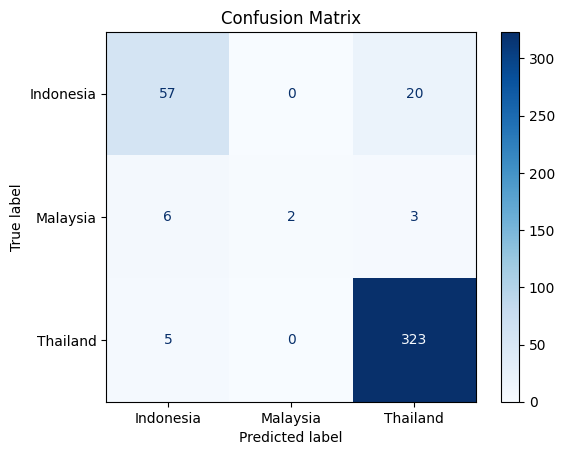

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(actuals, predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Compute metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    
    # Compute metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    return {
        'Train': {'Accuracy': train_accuracy, 'Precision': train_precision, 'Recall': train_recall, 'F1 Score': train_f1},
        'Test': {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1}
    }

# Evaluate the RandomForest model on both training and test sets
rf_results = evaluate_train_test(model, X_train, y_train, X_test, y_test)

# Display the results
print("RandomForest Model Evaluation")
for dataset in ['Train', 'Test']:
    print(f"{dataset} Set:")
    for metric, score in rf_results[dataset].items():
        print(f"{metric}: {score}")
    print()


RandomForest Model Evaluation
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.8333333333333334
Precision: 0.734090909090909
Recall: 0.5949583718778908
F1 Score: 0.6318550480726192



Train-Test 80:20, RF

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Compute metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    
    # Compute metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    return {
        'Train': {'Accuracy': train_accuracy, 'Precision': train_precision, 'Recall': train_recall, 'F1 Score': train_f1},
        'Test': {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1}
    }

# Evaluate the RandomForest model on both training and test sets
rf_results = evaluate_train_test(model, X_train, y_train, X_test, y_test)

# Display the results
print("RandomForest Model Evaluation")
for dataset in ['Train', 'Test']:
    print(f"{dataset} Set:")
    for metric, score in rf_results[dataset].items():
        print(f"{metric}: {score}")
    print()


RandomForest Model Evaluation
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.8541666666666666
Precision: 0.5648148148148149
Recall: 0.5579273855135924
F1 Score: 0.557745166550198



c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {title}')
    plt.show()


Train-Test 80:20, RF, GB, SVC, k-NN

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# List of models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'k-NN': KNeighborsClassifier()
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred, average='macro'),
        'Recall': recall_score(y_train, y_train_pred, average='macro'),
        'F1 Score': f1_score(y_train, y_train_pred, average='macro')
    }
    
    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='macro'),
        'Recall': recall_score(y_test, y_test_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_test_pred, average='macro')
    }
    
    return train_metrics, test_metrics

# Evaluate each model on both training and test sets
train_test_results = {}
for name, model in models.items():
    print(f"Evaluating train vs test for {name}...")
    train_metrics, test_metrics = evaluate_train_test(model, X_train, y_train, X_test, y_test)
    train_test_results[name] = {'Train': train_metrics, 'Test': test_metrics}

# Display the train vs test results
for model_name, metrics in train_test_results.items():
    print(f"Model: {model_name}")
    for dataset, dataset_metrics in metrics.items():
        print(f"{dataset} Set:")
        for metric_name, score in dataset_metrics.items():
            print(f"{metric_name}: {score}")
        print()


Evaluating train vs test for Random Forest...


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating train vs test for Gradient Boosting...
Evaluating train vs test for SVM...


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating train vs test for k-NN...
Model: Random Forest
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.8541666666666666
Precision: 0.5648148148148149
Recall: 0.5579273855135924
F1 Score: 0.557745166550198

Model: Gradient Boosting
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.8958333333333334
Precision: 0.9286492374727668
Recall: 0.6819467250501733
F1 Score: 0.7294801890221737

Model: SVM
Train Set:
Accuracy: 0.926509186351706
Precision: 0.9566934570663131
Recall: 0.6693121693121693
F1 Score: 0.7273378390696826

Test Set:
Accuracy: 0.8229166666666666
Precision: 0.5666438824333562
Recall: 0.5234446268929027
F1 Score: 0.5313492063492063

Model: k-NN
Train Set:
Accuracy: 0.958005249343832
Precision: 0.9692671394799054
Recall: 0.8175899719173962
F1 Score: 0.8720630638346466

Test Set:
Accuracy: 0.8958333333333334
Precision: 0.9352380952380952
Recall: 0.6757434774676154
F1 Score: 0.7280608929731738



K-Fold 10, RF

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable
X = df.drop(columns=['country_name', 'country_name_encoded', 'prov_char', 'country_char', 'wavenumber', 'thnoth_name', 'tgp_name', 'dgp_name', 'fgp_name'])
y = df['country_name_encoded']

# Cross-validation predictions
y_pred = cross_val_predict(model, X, y, cv=kf)

# Generate the classification report
report = classification_report(y, y_pred, target_names=label_encoder.classes_)
print(report)


              precision    recall  f1-score   support

   Indonesia       0.86      0.73      0.79       127
    Malaysia       0.50      0.15      0.24        13
    Thailand       0.90      0.98      0.94       337

    accuracy                           0.89       477
   macro avg       0.76      0.62      0.66       477
weighted avg       0.88      0.89      0.88       477



K-Fold 10, GBC

Gradient Boosting Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.89      0.80      0.84       127
    Malaysia       0.43      0.23      0.30        13
    Thailand       0.93      0.98      0.95       337

    accuracy                           0.91       477
   macro avg       0.75      0.67      0.70       477
weighted avg       0.90      0.91      0.91       477



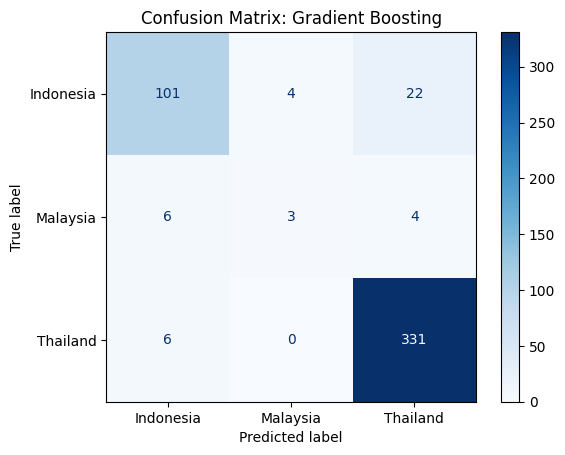

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable (assuming X and y are already prepared)
# Cross-validation predictions
y_pred_gbc = cross_val_predict(gbc, X, y, cv=kf)

# Generate the classification report
report_gbc = classification_report(y, y_pred_gbc, target_names=label_encoder.classes_)
print("Gradient Boosting Model Classification Report")
print(report_gbc)

# Plot the confusion matrix
cm_gbc = confusion_matrix(y, y_pred_gbc)
disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_gbc, display_labels=label_encoder.classes_)
disp_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Gradient Boosting')
plt.show()


In [17]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_gbc)
print(f"Gradient Boosting Model Test Accuracy: {accuracy}")


Gradient Boosting Model Test Accuracy: 0.9119496855345912


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Define the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable (assuming X and y are already prepared)
train_accuracies = []
test_accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gbc.fit(X_train, y_train)
    
    y_train_pred = gbc.predict(X_train)
    y_test_pred = gbc.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Calculate the average train and test accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Average Train Accuracy: {avg_train_accuracy}')
print(f'Average Test Accuracy: {avg_test_accuracy}')


Average Train Accuracy: 1.0
Average Test Accuracy: 0.9118351063829786


KFold 5, RF

5-Fold CV Average Train Accuracy: 1.0
5-Fold CV Average Test Accuracy: 0.8826315789473684
5-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.85      0.71      0.77       127
    Malaysia       1.00      0.15      0.27        13
    Thailand       0.89      0.98      0.93       337

    accuracy                           0.88       477
   macro avg       0.91      0.61      0.66       477
weighted avg       0.88      0.88      0.87       477



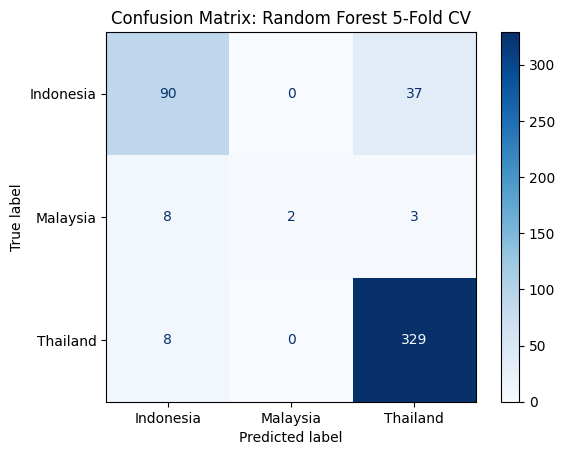

Class: Indonesia
precision: 0.8490566037735849
recall: 0.7086614173228346
f1-score: 0.7725321888412017
support: 127.0

Class: Malaysia
precision: 1.0
recall: 0.15384615384615385
f1-score: 0.26666666666666666
support: 13.0

Class: Thailand
precision: 0.8915989159891599
recall: 0.9762611275964391
f1-score: 0.9320113314447592
support: 337.0

accuracy: 0.8825995807127882

Class: macro avg
precision: 0.9135518399209149
recall: 0.6129228995884759
f1-score: 0.6570700623175426
support: 477.0

Class: weighted avg
precision: 0.8832264640830024
recall: 0.8825995807127882
f1-score: 0.8714173445416837
support: 477.0



In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Define the 5-fold cross-validation procedure
kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 5-fold cross-validation
for train_index, test_index in kf_5.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value for the test set
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'5-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'5-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf5 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("5-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_rf_kf5 = confusion_matrix(y_true_all, y_pred_all)
disp_rf_kf5 = ConfusionMatrixDisplay(confusion_matrix=cm_rf_kf5, display_labels=label_encoder.classes_)
disp_rf_kf5.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Random Forest 5-Fold CV')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf5.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 5, RF

5-Fold CV Average Train Accuracy: 1.0
5-Fold CV Average Test Accuracy: 0.8826315789473684
5-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.85      0.71      0.77       127
    Malaysia       1.00      0.15      0.27        13
    Thailand       0.89      0.98      0.93       337

    accuracy                           0.88       477
   macro avg       0.91      0.61      0.66       477
weighted avg       0.88      0.88      0.87       477



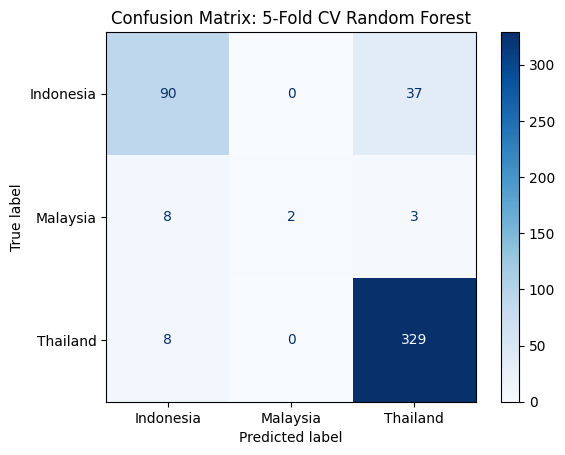

Class: Indonesia
precision: 0.8490566037735849
recall: 0.7086614173228346
f1-score: 0.7725321888412017
support: 127.0

Class: Malaysia
precision: 1.0
recall: 0.15384615384615385
f1-score: 0.26666666666666666
support: 13.0

Class: Thailand
precision: 0.8915989159891599
recall: 0.9762611275964391
f1-score: 0.9320113314447592
support: 337.0

accuracy: 0.8825995807127882

Class: macro avg
precision: 0.9135518399209149
recall: 0.6129228995884759
f1-score: 0.6570700623175426
support: 477.0

Class: weighted avg
precision: 0.8832264640830024
recall: 0.8825995807127882
f1-score: 0.8714173445416837
support: 477.0



In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the 5-fold cross-validation procedure
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'5-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'5-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf5 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("5-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf5 = confusion_matrix(y_true_all, y_pred_all)
disp_kf5 = ConfusionMatrixDisplay(confusion_matrix=cm_kf5, display_labels=label_encoder.classes_)
disp_kf5.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 5-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf5.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 10, RF

10-Fold CV Average Train Accuracy: 1.0
10-Fold CV Average Test Accuracy: 0.8910017730496455
10-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.86      0.73      0.79       127
    Malaysia       0.50      0.15      0.24        13
    Thailand       0.90      0.98      0.94       337

    accuracy                           0.89       477
   macro avg       0.76      0.62      0.66       477
weighted avg       0.88      0.89      0.88       477



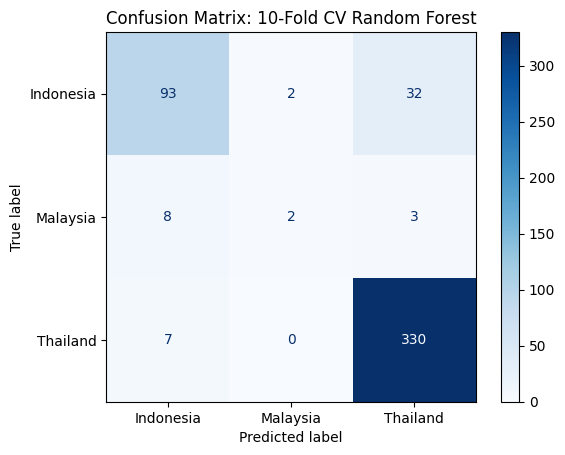

Class: Indonesia
precision: 0.8611111111111112
recall: 0.7322834645669292
f1-score: 0.7914893617021277
support: 127.0

Class: Malaysia
precision: 0.5
recall: 0.15384615384615385
f1-score: 0.23529411764705882
support: 13.0

Class: Thailand
precision: 0.9041095890410958
recall: 0.9792284866468842
f1-score: 0.9401709401709402
support: 337.0

accuracy: 0.8909853249475891

Class: macro avg
precision: 0.7550735667174023
recall: 0.6217860350199891
f1-score: 0.6556514731733756
support: 477.0

Class: weighted avg
precision: 0.8816478880879673
recall: 0.8909853249475891
f1-score: 0.8813743800905426
support: 477.0



In [21]:
# Define the 10-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf10 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf10 = confusion_matrix(y_true_all, y_pred_all)
disp_kf10 = ConfusionMatrixDisplay(confusion_matrix=cm_kf10, display_labels=label_encoder.classes_)
disp_kf10.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf10.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 40, RF

40-Fold CV Average Train Accuracy: 1.0
40-Fold CV Average Test Accuracy: 0.9053030303030303
40-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.88      0.77      0.82       127
    Malaysia       0.80      0.31      0.44        13
    Thailand       0.91      0.98      0.95       337

    accuracy                           0.91       477
   macro avg       0.87      0.69      0.74       477
weighted avg       0.90      0.91      0.90       477



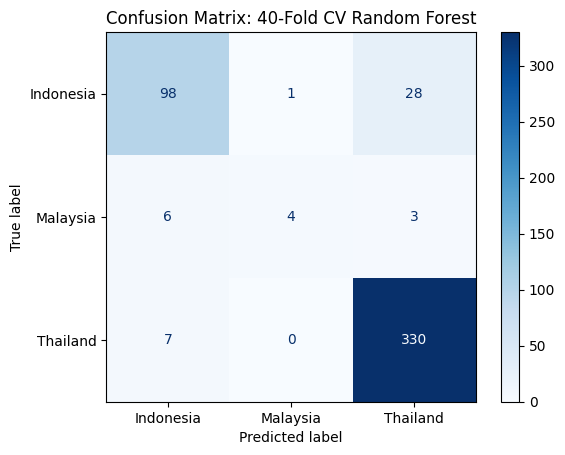

Class: Indonesia
precision: 0.8828828828828829
recall: 0.7716535433070866
f1-score: 0.8235294117647058
support: 127.0

Class: Malaysia
precision: 0.8
recall: 0.3076923076923077
f1-score: 0.4444444444444444
support: 13.0

Class: Thailand
precision: 0.9141274238227147
recall: 0.9792284866468842
f1-score: 0.9455587392550143
support: 337.0

accuracy: 0.9056603773584906

Class: macro avg
precision: 0.8656701022351992
recall: 0.6861914458820929
f1-score: 0.7378441984880548
support: 477.0

Class: weighted avg
precision: 0.9026982556695619
recall: 0.9056603773584906
f1-score: 0.8994115475908495
support: 477.0



In [22]:
# Define the 40-fold cross-validation procedure
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf40 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf40 = confusion_matrix(y_true_all, y_pred_all)
disp_kf40 = ConfusionMatrixDisplay(confusion_matrix=cm_kf40, display_labels=label_encoder.classes_)
disp_kf40.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf40.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Variance Threshold

10-Fold CV with Variance Threshold - Average Train Accuracy: 1.0
10-Fold CV with Variance Threshold - Average Test Accuracy: 0.8910017730496455
10-Fold CV Random Forest Model with Variance Threshold Classification Report
              precision    recall  f1-score   support

   Indonesia       0.86      0.73      0.79       127
    Malaysia       0.50      0.15      0.24        13
    Thailand       0.90      0.98      0.94       337

    accuracy                           0.89       477
   macro avg       0.76      0.62      0.66       477
weighted avg       0.88      0.89      0.88       477



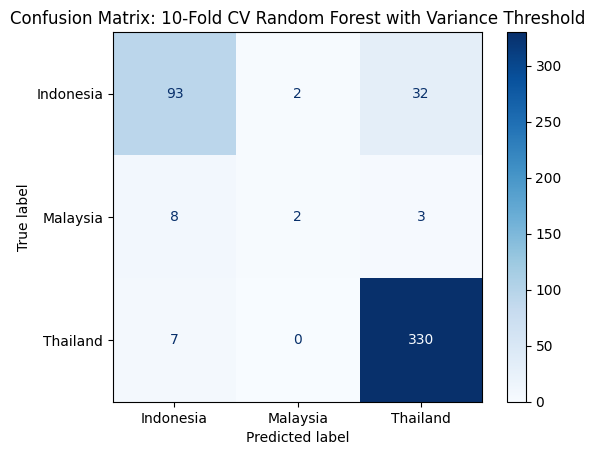

Class: Indonesia
precision: 0.8611111111111112
recall: 0.7322834645669292
f1-score: 0.7914893617021277
support: 127.0

Class: Malaysia
precision: 0.5
recall: 0.15384615384615385
f1-score: 0.23529411764705882
support: 13.0

Class: Thailand
precision: 0.9041095890410958
recall: 0.9792284866468842
f1-score: 0.9401709401709402
support: 337.0

accuracy: 0.8909853249475891

Class: macro avg
precision: 0.7550735667174023
recall: 0.6217860350199891
f1-score: 0.6556514731733756
support: 477.0

Class: weighted avg
precision: 0.8816478880879673
recall: 0.8909853249475891
f1-score: 0.8813743800905426
support: 477.0



In [23]:
from sklearn.feature_selection import VarianceThreshold

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Variance Threshold
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)

# Define the 10-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_var):
    X_train, X_test = X_var[train_index], X_var[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Variance Threshold - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Variance Threshold - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_var = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with Variance Threshold Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_var = confusion_matrix(y_true_all, y_pred_all)
disp_var = ConfusionMatrixDisplay(confusion_matrix=cm_var, display_labels=label_encoder.classes_)
disp_var.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with Variance Threshold')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_var.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Recursive Feature Elimination (RFE)

10-Fold CV with RFE - Average Train Accuracy: 1.0
10-Fold CV with RFE - Average Test Accuracy: 0.934973404255319
10-Fold CV Random Forest Model with RFE Classification Report
              precision    recall  f1-score   support

   Indonesia       0.90      0.88      0.89       127
    Malaysia       0.83      0.38      0.53        13
    Thailand       0.95      0.98      0.96       337

    accuracy                           0.94       477
   macro avg       0.89      0.75      0.79       477
weighted avg       0.93      0.94      0.93       477



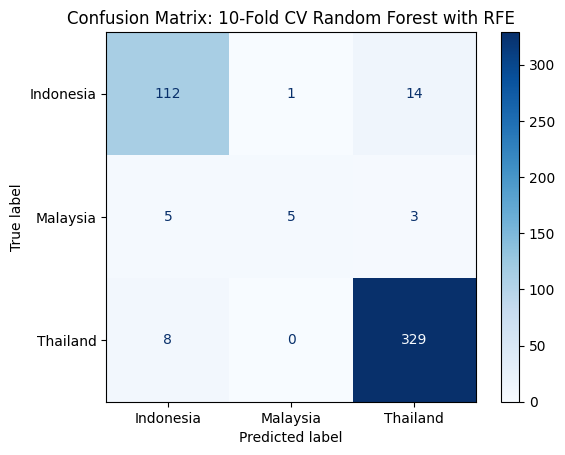

Class: Indonesia
precision: 0.896
recall: 0.8818897637795275
f1-score: 0.8888888888888888
support: 127.0

Class: Malaysia
precision: 0.8333333333333334
recall: 0.38461538461538464
f1-score: 0.5263157894736842
support: 13.0

Class: Thailand
precision: 0.9508670520231214
recall: 0.9762611275964391
f1-score: 0.9633967789165446
support: 337.0

accuracy: 0.9350104821802935

Class: macro avg
precision: 0.8934001284521517
recall: 0.7475887586637837
f1-score: 0.7928671524263725
support: 477.0

Class: weighted avg
precision: 0.933055618165881
recall: 0.9350104821802935
f1-score: 0.9316471879390404
support: 477.0



In [24]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
selector_rfe = RFE(model_rf, n_features_to_select=50, step=10)
X_rfe = selector_rfe.fit_transform(X, y)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with RFE - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with RFE - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_rfe = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with RFE Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_rfe = confusion_matrix(y_true_all, y_pred_all)
disp_rfe = ConfusionMatrixDisplay(confusion_matrix=cm_rfe, display_labels=label_encoder.classes_)
disp_rfe.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with RFE')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_rfe.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

SelectKBest using ANOVA F-test

10-Fold CV with SelectKBest - Average Train Accuracy: 1.0
10-Fold CV with SelectKBest - Average Test Accuracy: 0.8593971631205675
10-Fold CV Random Forest Model with SelectKBest Classification Report
              precision    recall  f1-score   support

   Indonesia       0.81      0.67      0.73       127
    Malaysia       0.56      0.38      0.45        13
    Thailand       0.88      0.95      0.91       337

    accuracy                           0.86       477
   macro avg       0.75      0.67      0.70       477
weighted avg       0.85      0.86      0.85       477



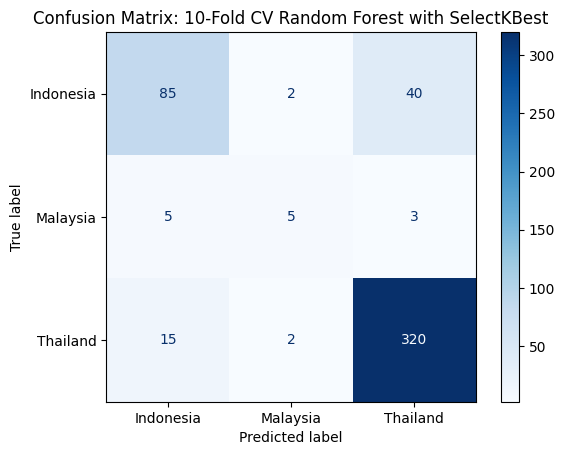

Class: Indonesia
precision: 0.8095238095238095
recall: 0.6692913385826772
f1-score: 0.7327586206896551
support: 127.0

Class: Malaysia
precision: 0.5555555555555556
recall: 0.38461538461538464
f1-score: 0.45454545454545453
support: 13.0

Class: Thailand
precision: 0.8815426997245179
recall: 0.9495548961424333
f1-score: 0.9142857142857143
support: 337.0

accuracy: 0.859538784067086

Class: macro avg
precision: 0.7488740216012943
recall: 0.667820539780165
f1-score: 0.7005299298402746
support: 477.0

Class: weighted avg
precision: 0.8534835132891165
recall: 0.859538784067086
f1-score: 0.8534249925596704
support: 477.0



In [25]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest
selector_kbest = SelectKBest(f_classif, k=50)
X_kbest = selector_kbest.fit_transform(X, y)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_kbest):
    X_train, X_test = X_kbest[train_index], X_kbest[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with SelectKBest - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with SelectKBest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kbest = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with SelectKBest Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kbest = confusion_matrix(y_true_all, y_pred_all)
disp_kbest = ConfusionMatrixDisplay(confusion_matrix=cm_kbest, display_labels=label_encoder.classes_)
disp_kbest.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with SelectKBest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kbest.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tree-based Feature Selection using RandomForest

10-Fold CV with Tree-based Feature Selection - Average Train Accuracy: 1.0
10-Fold CV with Tree-based Feature Selection - Average Test Accuracy: 0.9097960992907801
10-Fold CV Random Forest Model with Tree-based Feature Selection Classification Report
              precision    recall  f1-score   support

   Indonesia       0.87      0.80      0.84       127
    Malaysia       0.67      0.15      0.25        13
    Thailand       0.92      0.98      0.95       337

    accuracy                           0.91       477
   macro avg       0.82      0.65      0.68       477
weighted avg       0.90      0.91      0.90       477



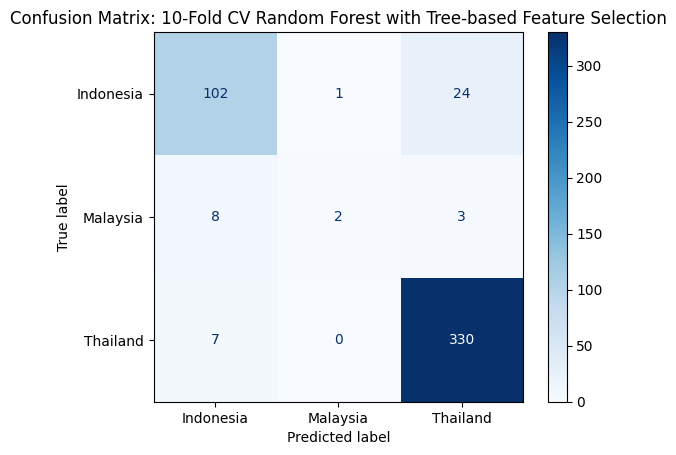

Class: Indonesia
precision: 0.8717948717948718
recall: 0.8031496062992126
f1-score: 0.8360655737704918
support: 127.0

Class: Malaysia
precision: 0.6666666666666666
recall: 0.15384615384615385
f1-score: 0.25
support: 13.0

Class: Thailand
precision: 0.9243697478991597
recall: 0.9792284866468842
f1-score: 0.9510086455331412
support: 337.0

accuracy: 0.909853249475891

Class: macro avg
precision: 0.8209437621202328
recall: 0.6454080822640836
f1-score: 0.6790247397678777
support: 477.0

Class: weighted avg
precision: 0.9033484704960842
recall: 0.909853249475891
f1-score: 0.9013002964644047
support: 477.0



In [26]:
# Tree-based feature selection using RandomForest
model_rf.fit(X, y)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[-50:]  # Select top 50 features

X_tree = X.iloc[:, indices]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_tree):
    X_train, X_test = X_tree.iloc[train_index], X_tree.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tree-based Feature Selection - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tree-based Feature Selection - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tree = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with Tree-based Feature Selection Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tree = confusion_matrix(y_true_all, y_pred_all)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=label_encoder.classes_)
disp_tree.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with Tree-based Feature Selection')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tree.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()



Perform RFE and Identify Selected Features

In [27]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Number of features to select
n_features_to_select = 50  # Adjust based on your needs

# Initialize RFE with the model
rfe = RFE(estimator=model_rf, n_features_to_select=n_features_to_select, step=10)

# Fit RFE on the dataset
rfe.fit(X, y)

# Identify the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['664.839', '665.803', '666.285', '904.451', '1054.389', '1055.354',
       '1134.421', '1136.349', '1137.313', '1137.795', '1139.242', '1139.724',
       '1140.206', '1140.688', '1141.17', '1176.847', '1736.584', '1737.067',
       '1738.031', '1751.048', '1752.012', '1752.494', '1753.941', '1754.423',
       '1973.304', '1973.786', '1974.268', '2001.266', '2001.749', '2002.231',
       '2003.677', '2845.453', '2848.346', '2849.792', '2850.756', '2851.238',
       '2895.593', '2897.521', '2898.486', '2901.378', '2916.806', '2917.288',
       '2917.77', '2948.144', '2957.786', '3010.337', '3093.743', '3397.476',
       '3397.959', '3675.658'],
      dtype='object')


Feature Selection with RFE and Random Forest

In [28]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Recursive Feature Elimination
selector_rfe = RFE(model_rf, n_features_to_select=50, step=10)
X_rfe = selector_rfe.fit_transform(X, y)

# Verify the selected features
print("Selected features:", selector_rfe.get_support(indices=True))


Selected features: [  31   33   34  528  839  841 1005 1009 1011 1012 1015 1016 1017 1018
 1019 1093 2254 2255 2257 2284 2286 2287 2290 2291 2745 2746 2747 2803
 2804 2805 2808 4554 4560 4563 4565 4566 4658 4662 4664 4670 4702 4703
 4704 4767 4787 4896 5069 5699 5700 6276]


Hyperparameter Tuning for Random Forest

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_rf.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score:", grid_search_rf.best_score_)


Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.8240789473684211


Evaluate Tuned Random Forest Model

10-Fold CV with Tuned Random Forest - Average Train Accuracy: 0.9736786469344608
10-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.913918439716312
10-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.85      0.83      0.84       127
    Malaysia       0.00      0.00      0.00        13
    Thailand       0.93      0.98      0.96       337

    accuracy                           0.91       477
   macro avg       0.60      0.60      0.60       477
weighted avg       0.89      0.91      0.90       477



c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

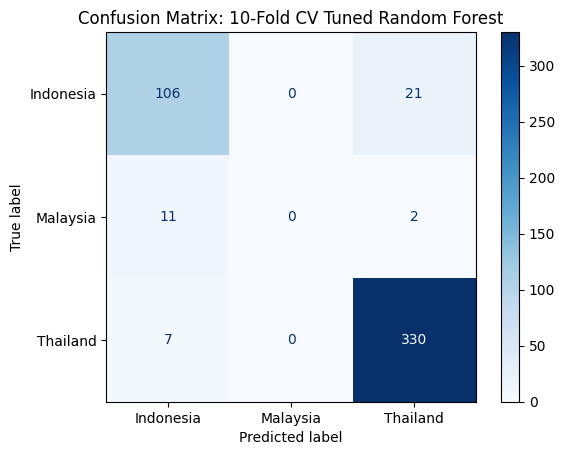

Class: Indonesia
precision: 0.8548387096774194
recall: 0.8346456692913385
f1-score: 0.8446215139442231
support: 127.0

Class: Malaysia
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 13.0

Class: Thailand
precision: 0.9348441926345609
recall: 0.9792284866468842
f1-score: 0.9565217391304348
support: 337.0

accuracy: 0.9140461215932913

Class: macro avg
precision: 0.5965609674373268
recall: 0.6046247186460743
f1-score: 0.6003810843582192
support: 477.0

Class: weighted avg
precision: 0.8880650084840237
recall: 0.9140461215932913
f1-score: 0.900659870771222
support: 477.0



In [30]:
# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Random Forest model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_rf = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_rf = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_rf, display_labels=label_encoder.classes_)
disp_tuned_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Evaluate LDA Model

10-Fold CV with LDA - Average Train Accuracy: 0.9191700547514501
10-Fold CV with LDA - Average Test Accuracy: 0.8574911347517731
10-Fold CV LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.77      0.75      0.76       127
    Malaysia       0.18      0.15      0.17        13
    Thailand       0.91      0.93      0.92       337

    accuracy                           0.86       477
   macro avg       0.62      0.61      0.61       477
weighted avg       0.85      0.86      0.86       477



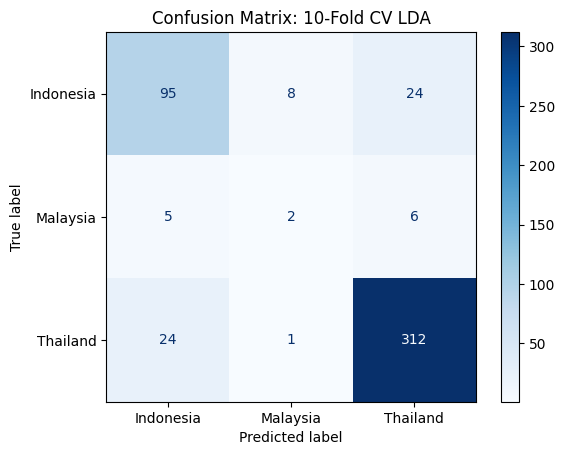

Class: Indonesia
precision: 0.7661290322580645
recall: 0.7480314960629921
f1-score: 0.7569721115537849
support: 127.0

Class: Malaysia
precision: 0.18181818181818182
recall: 0.15384615384615385
f1-score: 0.16666666666666666
support: 13.0

Class: Thailand
precision: 0.9122807017543859
recall: 0.9258160237388724
f1-score: 0.9189985272459499
support: 337.0

accuracy: 0.8574423480083857

Class: macro avg
precision: 0.6200759719435441
recall: 0.6092312245493394
f1-score: 0.6142124351554671
support: 477.0

Class: weighted avg
precision: 0.8534604191858252
recall: 0.8574423480083857
f1-score: 0.8553556153372798
support: 477.0



In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the LDA model
model_lda = LinearDiscriminantAnalysis()

# Perform 10-fold cross-validation with LDA
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_lda.predict(X_train)
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_lda = confusion_matrix(y_true_all, y_pred_all)
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=label_encoder.classes_)
disp_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for LDA

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_grid_lda = [
    {'solver': ['svd']},  # 'svd' does not use 'shrinkage'
    {'solver': ['lsqr', 'eigen'], 'shrinkage': ['auto', 0.1, 0.5, 0.9]}  # 'lsqr' and 'eigen' can use 'shrinkage'
]

# Set up the GridSearchCV
grid_search_lda = GridSearchCV(estimator=LinearDiscriminantAnalysis(), param_grid=param_grid_lda, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_lda.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for LDA:", grid_search_lda.best_params_)
print("Best cross-validation score for LDA:", grid_search_lda.best_score_)


Best parameters for LDA: {'solver': 'svd'}
Best cross-validation score for LDA: 0.7545833333333334


Evaluate Tuned LDA Model

10-Fold CV with Tuned LDA - Average Train Accuracy: 0.9191700547514501
10-Fold CV with Tuned LDA - Average Test Accuracy: 0.8574911347517731
10-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.77      0.75      0.76       127
    Malaysia       0.18      0.15      0.17        13
    Thailand       0.91      0.93      0.92       337

    accuracy                           0.86       477
   macro avg       0.62      0.61      0.61       477
weighted avg       0.85      0.86      0.86       477



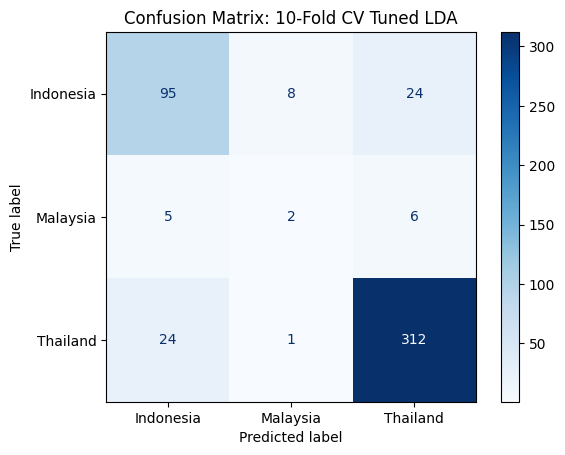

Class: Indonesia
precision: 0.7661290322580645
recall: 0.7480314960629921
f1-score: 0.7569721115537849
support: 127.0

Class: Malaysia
precision: 0.18181818181818182
recall: 0.15384615384615385
f1-score: 0.16666666666666666
support: 13.0

Class: Thailand
precision: 0.9122807017543859
recall: 0.9258160237388724
f1-score: 0.9189985272459499
support: 337.0

accuracy: 0.8574423480083857

Class: macro avg
precision: 0.6200759719435441
recall: 0.6092312245493394
f1-score: 0.6142124351554671
support: 477.0

Class: weighted avg
precision: 0.8534604191858252
recall: 0.8574423480083857
f1-score: 0.8553556153372798
support: 477.0



In [33]:
# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 10-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lda = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lda = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lda, display_labels=label_encoder.classes_)
disp_tuned_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for Ridge Regression

In [34]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Ridge model
model_ridge = RidgeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Set up the GridSearchCV
grid_search_ridge = GridSearchCV(estimator=model_ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_ridge.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best cross-validation score for Ridge:", grid_search_ridge.best_score_)


Best parameters for Ridge: {'alpha': 0.1}
Best cross-validation score for Ridge: 0.7756798245614036


Evaluate Tuned Ridge Model

10-Fold CV with Tuned Ridge - Average Train Accuracy: 0.8921483167994795
10-Fold CV with Tuned Ridge - Average Test Accuracy: 0.874113475177305
10-Fold CV Tuned Ridge Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.83      0.75      0.79       127
    Malaysia       0.00      0.00      0.00        13
    Thailand       0.89      0.96      0.92       337

    accuracy                           0.87       477
   macro avg       0.57      0.57      0.57       477
weighted avg       0.85      0.87      0.86       477



c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

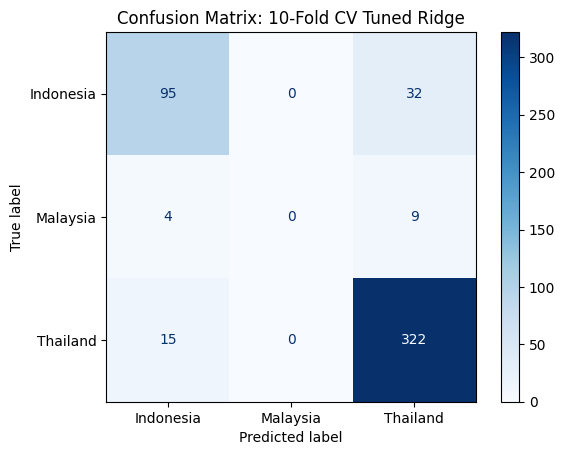

Class: Indonesia
precision: 0.8333333333333334
recall: 0.7480314960629921
f1-score: 0.7883817427385892
support: 127.0

Class: Malaysia
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 13.0

Class: Thailand
precision: 0.8870523415977961
recall: 0.9554896142433235
f1-score: 0.92
support: 337.0

accuracy: 0.8742138364779874

Class: macro avg
precision: 0.5734618916437099
recall: 0.5678403701021052
f1-score: 0.5694605809128631
support: 477.0

Class: weighted avg
precision: 0.8485743657270244
recall: 0.8742138364779874
f1-score: 0.8598836086536705
support: 477.0



In [35]:
# Define the best Ridge model with the obtained parameters
best_ridge = RidgeClassifier(**grid_search_ridge.best_params_)

# Perform 10-fold cross-validation with the tuned Ridge model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_ridge.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_ridge.predict(X_train)
    y_test_pred = best_ridge.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Ridge - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Ridge - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_ridge_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Ridge Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_ridge = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_ridge = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_ridge, display_labels=label_encoder.classes_)
disp_tuned_ridge.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Ridge')
plt.show()

# Display the detailed results
for class_name, metrics in report_ridge_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for LightGBM

In [36]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Define the LightGBM model
model_lgbm = LGBMClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_lgbm = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Set up the GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=model_lgbm, param_grid=param_grid_lgbm, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_lgbm.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for LightGBM:", grid_search_lgbm.best_params_)
print("Best cross-validation score for LightGBM:", grid_search_lgbm.best_score_)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7971
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 50
[LightGBM] [Info] Start training from score -1.323329
[LightGBM] [Info] Start training from score -3.602567
[LightGBM] [Info] Start training from score -0.347434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

Evaluate Tuned LightGBM Model

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7172
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 50
[LightGBM] [Info] Start training from score -1.360977
[LightGBM] [Info] Start training from score -3.576550
[LightGBM] [Info] Start training from score -0.334609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

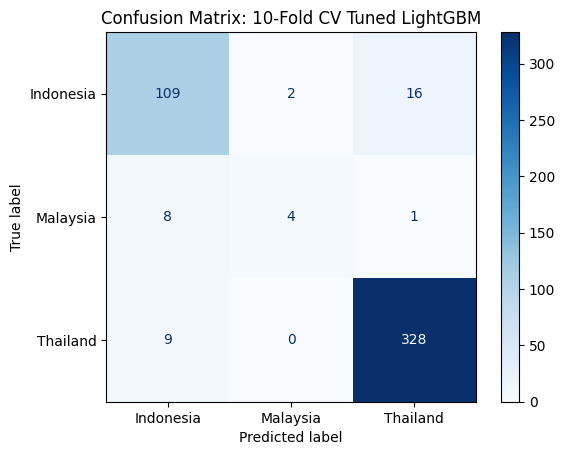

Class: Indonesia
precision: 0.8650793650793651
recall: 0.8582677165354331
f1-score: 0.8616600790513834
support: 127.0

Class: Malaysia
precision: 0.6666666666666666
recall: 0.3076923076923077
f1-score: 0.42105263157894735
support: 13.0

Class: Thailand
precision: 0.9507246376811594
recall: 0.973293768545994
f1-score: 0.9618768328445748
support: 337.0

accuracy: 0.9245283018867925

Class: macro avg
precision: 0.8274902231423971
recall: 0.7130845975912449
f1-score: 0.7481965144916352
support: 477.0

Class: weighted avg
precision: 0.9201801864366809
recall: 0.9245283018867925
f1-score: 0.920454941129295
support: 477.0



In [37]:
# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned LightGBM model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgbm_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lgbm = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lgbm, display_labels=label_encoder.classes_)
disp_tuned_lgbm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgbm_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for Extra Trees

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Define the Extra Trees model
model_et = ExtraTreesClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_et = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search_et = GridSearchCV(estimator=model_et, param_grid=param_grid_et, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_et.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Extra Trees:", grid_search_et.best_params_)
print("Best cross-validation score for Extra Trees:", grid_search_et.best_score_)


Best parameters for Extra Trees: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score for Extra Trees: 0.821907894736842


Evaluate Tuned Extra Trees Model

10-Fold CV with Tuned Extra Trees - Average Train Accuracy: 1.0
10-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.9433067375886524
10-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.93      0.88      0.90       127
    Malaysia       0.86      0.46      0.60        13
    Thailand       0.95      0.99      0.97       337

    accuracy                           0.94       477
   macro avg       0.91      0.78      0.82       477
weighted avg       0.94      0.94      0.94       477



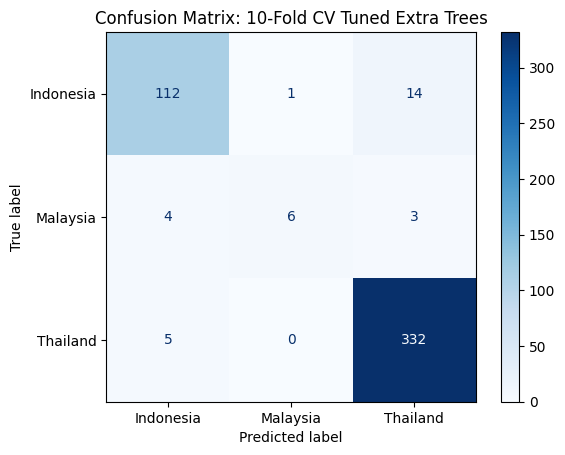

Class: Indonesia
precision: 0.9256198347107438
recall: 0.8818897637795275
f1-score: 0.9032258064516129
support: 127.0

Class: Malaysia
precision: 0.8571428571428571
recall: 0.46153846153846156
f1-score: 0.6
support: 13.0

Class: Thailand
precision: 0.9512893982808023
recall: 0.9851632047477745
f1-score: 0.967930029154519
support: 337.0

accuracy: 0.9433962264150944

Class: macro avg
precision: 0.9113506967114677
recall: 0.7761971433552546
f1-score: 0.8237186118687106
support: 477.0

Class: weighted avg
precision: 0.9418891056011572
recall: 0.9433962264150944
f1-score: 0.9406752562776263
support: 477.0



In [39]:
# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Extra Trees model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_et = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_et = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_et, display_labels=label_encoder.classes_)
disp_tuned_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Define and Set Up the Gradient Boosting Classifier (GBC)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting Classifier model
model_gbc = GradientBoostingClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# Set up the GridSearchCV
grid_search_gbc = GridSearchCV(estimator=model_gbc, param_grid=param_grid_gbc, cv=5, n_jobs=-1, scoring='accuracy')


Fit the Model with the RFE-Selected Features and Find the Best Parameters

In [41]:
# Fit the model with the RFE-selected features
grid_search_gbc.fit(X_rfe, y)

# Get the best parameters and score
best_params_gbc = grid_search_gbc.best_params_
best_score_gbc = grid_search_gbc.best_score_

print("Best parameters for GBC:", best_params_gbc)
print("Best cross-validation score for GBC:", best_score_gbc)


Best parameters for GBC: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Best cross-validation score for GBC: 0.8092105263157894


Evaluate the Tuned Gradient Boosting Classifier (GBC)

In [42]:
from sklearn.metrics import classification_report, accuracy_score

# Get the best estimator
best_gbc = grid_search_gbc.best_estimator_

# Perform 10-Fold Cross-Validation and evaluate the model
from sklearn.model_selection import cross_val_predict

y_pred_gbc = cross_val_predict(best_gbc, X_rfe, y, cv=10)

# Calculate accuracy
accuracy_gbc = accuracy_score(y, y_pred_gbc)

# Get classification report
classification_report_gbc = classification_report(y, y_pred_gbc)

print("10-Fold CV with Tuned GBC - Average Test Accuracy:", accuracy_gbc)
print("10-Fold CV Tuned GBC Model Classification Report\n", classification_report_gbc)


10-Fold CV with Tuned GBC - Average Test Accuracy: 0.8511530398322851
10-Fold CV Tuned GBC Model Classification Report
               precision    recall  f1-score   support

           0       0.79      0.62      0.70       127
           1       0.50      0.54      0.52        13
           2       0.88      0.95      0.91       337

    accuracy                           0.85       477
   macro avg       0.72      0.70      0.71       477
weighted avg       0.85      0.85      0.85       477



10-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
10-Fold CV with Tuned GBC - Average Test Accuracy: 0.9307624113475178
10-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.87      0.87      0.87       127
    Malaysia       0.80      0.31      0.44        13
    Thailand       0.95      0.98      0.96       337

    accuracy                           0.93       477
   macro avg       0.88      0.72      0.76       477
weighted avg       0.93      0.93      0.93       477



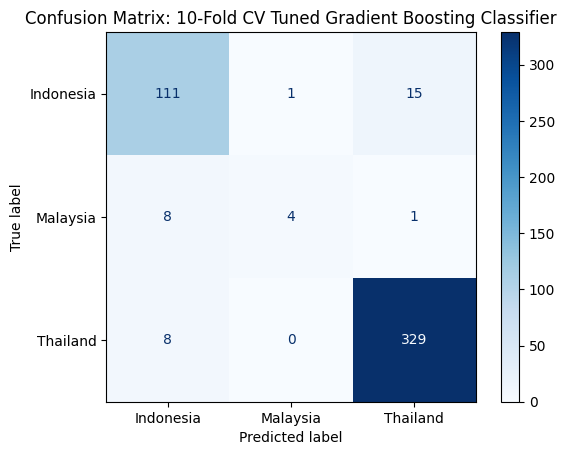

Class: Indonesia
precision: 0.8740157480314961
recall: 0.8740157480314961
f1-score: 0.8740157480314961
support: 127.0

Class: Malaysia
precision: 0.8
recall: 0.3076923076923077
f1-score: 0.4444444444444444
support: 13.0

Class: Thailand
precision: 0.9536231884057971
recall: 0.9762611275964391
f1-score: 0.9648093841642229
support: 337.0

accuracy: 0.9308176100628931

Class: macro avg
precision: 0.8758796454790977
recall: 0.7193230611067477
f1-score: 0.7610898588800544
support: 477.0

Class: weighted avg
precision: 0.9282411205298817
recall: 0.9308176100628931
f1-score: 0.9264539627696454
support: 477.0



In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best GBC model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Gradient Boosting Classifier model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gbc, display_labels=label_encoder.classes_)
disp_tuned_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Gradient Boosting Classifier')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Define the k-NN Model and Parameter Grid

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the k-NN model
model_knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up the GridSearchCV
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_knn.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for k-NN:", grid_search_knn.best_params_)
print("Best cross-validation score for k-NN:", grid_search_knn.best_score_)


Best parameters for k-NN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score for k-NN: 0.7903728070175438


Evaluate the Tuned k-NN Model

10-Fold CV with Tuned k-NN - Average Train Accuracy: 0.9790345313601128
10-Fold CV with Tuned k-NN - Average Test Accuracy: 0.9433510638297872
10-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.87      0.94      0.90       127
    Malaysia       0.75      0.23      0.35        13
    Thailand       0.98      0.97      0.97       337

    accuracy                           0.94       477
   macro avg       0.86      0.71      0.74       477
weighted avg       0.94      0.94      0.94       477



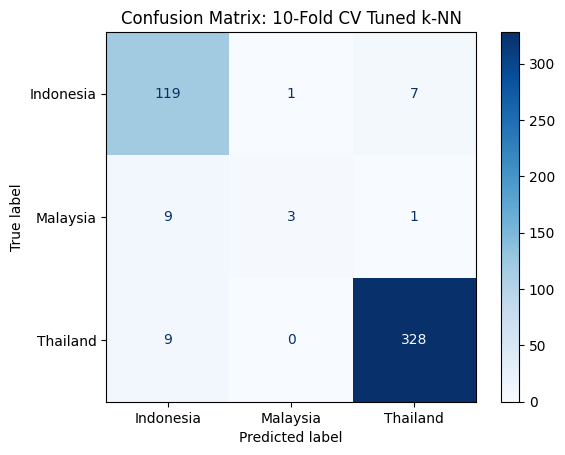

Class: Indonesia
precision: 0.8686131386861314
recall: 0.937007874015748
f1-score: 0.9015151515151515
support: 127.0

Class: Malaysia
precision: 0.75
recall: 0.23076923076923078
f1-score: 0.35294117647058826
support: 13.0

Class: Thailand
precision: 0.9761904761904762
recall: 0.973293768545994
f1-score: 0.974739970282318
support: 337.0

accuracy: 0.9433962264150944

Class: macro avg
precision: 0.8649345382922026
recall: 0.7136902911103243
f1-score: 0.7430654327560192
support: 477.0

Class: weighted avg
precision: 0.9413837716757425
recall: 0.9433962264150944
f1-score: 0.9382977558106562
support: 477.0



In [45]:
# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Perform 10-fold cross-validation with the tuned k-NN model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_knn = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_knn = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_knn, display_labels=label_encoder.classes_)
disp_tuned_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tune and evaluate the Logistic Regression (LogReg) model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the Logistic Regression model
model_logreg = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Set up the GridSearchCV
grid_search_logreg = GridSearchCV(estimator=model_logreg, param_grid=param_grid_logreg, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_logreg.fit(X_rfe, y)

# Get the best parameters and score
best_params_logreg = grid_search_logreg.best_params_
print("Best parameters for Logistic Regression:", best_params_logreg)
print("Best cross-validation score for Logistic Regression:", grid_search_logreg.best_score_)



Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.7673684210526316


10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.8982035019244321
10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.8551418439716312
10-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.79      0.69      0.74       127
    Malaysia       0.50      0.08      0.13        13
    Thailand       0.88      0.95      0.91       337

    accuracy                           0.86       477
   macro avg       0.72      0.57      0.59       477
weighted avg       0.84      0.86      0.84       477



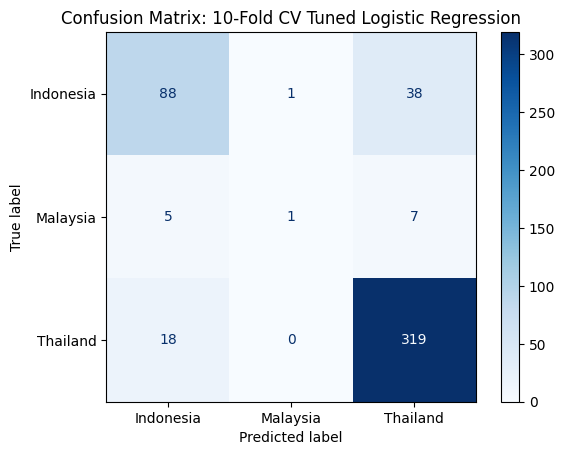

Class: Indonesia
precision: 0.7927927927927928
recall: 0.6929133858267716
f1-score: 0.7394957983193278
support: 127.0

Class: Malaysia
precision: 0.5
recall: 0.07692307692307693
f1-score: 0.13333333333333333
support: 13.0

Class: Thailand
precision: 0.8763736263736264
recall: 0.9465875370919882
f1-score: 0.9101283880171184
support: 337.0

accuracy: 0.8553459119496856

Class: macro avg
precision: 0.723055473055473
recall: 0.5721413332806122
f1-score: 0.5943191732232598
support: 477.0

Class: weighted avg
precision: 0.8438628863157164
recall: 0.8553459119496856
f1-score: 0.8435273930433057
support: 477.0



In [47]:
# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, max_iter=1000, random_state=42)

# Perform 10-fold cross-validation with the tuned Logistic Regression model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logreg, display_labels=label_encoder.classes_)
disp_tuned_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Define the Decision Tree Model and Parameter Grid for Tuning

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Set up the GridSearchCV
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_dt.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score for Decision Tree: 0.7483552631578947


Evaluate the Tuned Decision Tree Model

10-Fold CV with Tuned Decision Tree - Average Train Accuracy: 0.9939431885943515
10-Fold CV with Tuned Decision Tree - Average Test Accuracy: 0.8699468085106382
10-Fold CV Tuned Decision Tree Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.75      0.80      0.78       127
    Malaysia       0.30      0.23      0.26        13
    Thailand       0.94      0.92      0.93       337

    accuracy                           0.87       477
   macro avg       0.66      0.65      0.65       477
weighted avg       0.87      0.87      0.87       477



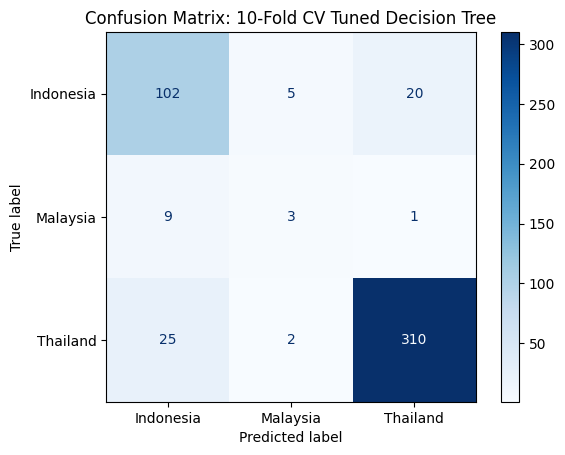

Class: Indonesia
precision: 0.75
recall: 0.8031496062992126
f1-score: 0.7756653992395437
support: 127.0

Class: Malaysia
precision: 0.3
recall: 0.23076923076923078
f1-score: 0.2608695652173913
support: 13.0

Class: Thailand
precision: 0.9365558912386707
recall: 0.9198813056379822
f1-score: 0.9281437125748503
support: 337.0

accuracy: 0.870020964360587

Class: macro avg
precision: 0.6621852970795569
recall: 0.6512667142354752
f1-score: 0.6548928923439284
support: 477.0

Class: weighted avg
precision: 0.869537390665476
recall: 0.870020964360587
f1-score: 0.8693610926393557
support: 477.0



In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best Decision Tree model with the obtained parameters
best_dt = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Decision Tree model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_dt.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_dt.predict(X_train)
    y_test_pred = best_dt.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Decision Tree - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Decision Tree - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_dt_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Decision Tree Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_dt = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_dt = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_dt, display_labels=label_encoder.classes_)
disp_tuned_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Decision Tree')
plt.show()

# Display the detailed results
for class_name, metrics in report_dt_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tune the Gaussian Naive Bayes (GNB) Model

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the GNB model
model_gnb = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid_gnb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Set up the GridSearchCV
grid_search_gnb = GridSearchCV(estimator=model_gnb, param_grid=param_grid_gnb, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_gnb.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for GNB:", grid_search_gnb.best_params_)
print("Best cross-validation score for GNB:", grid_search_gnb.best_score_)


Best parameters for GNB: {'var_smoothing': np.float64(0.0015199110829529332)}
Best cross-validation score for GNB: 0.624671052631579


Evaluate the Tuned Gaussian Naive Bayes (GNB) Model

10-Fold CV with Tuned GNB - Average Train Accuracy: 0.66993006993007
10-Fold CV with Tuned GNB - Average Test Accuracy: 0.670700354609929
10-Fold CV Tuned GNB Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.79      0.27      0.40       127
    Malaysia       0.12      1.00      0.22        13
    Thailand       0.83      0.81      0.82       337

    accuracy                           0.67       477
   macro avg       0.58      0.69      0.48       477
weighted avg       0.80      0.67      0.69       477



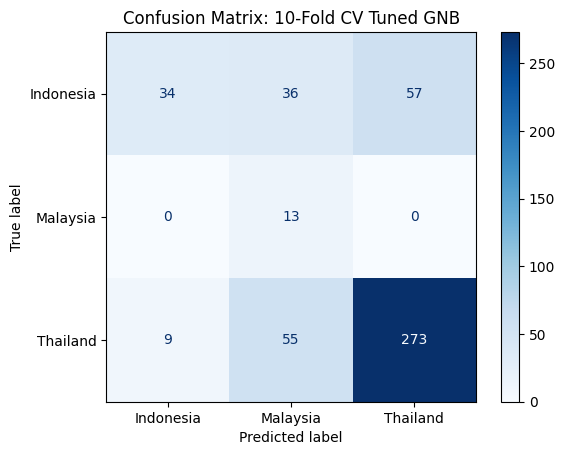

Class: Indonesia
precision: 0.7906976744186046
recall: 0.2677165354330709
f1-score: 0.4
support: 127.0

Class: Malaysia
precision: 0.125
recall: 1.0
f1-score: 0.2222222222222222
support: 13.0

Class: Thailand
precision: 0.8272727272727273
recall: 0.8100890207715133
f1-score: 0.8185907046476761
support: 337.0

accuracy: 0.6708595387840671

Class: macro avg
precision: 0.5809901338971106
recall: 0.6926018520681948
f1-score: 0.48027097562329946
support: 477.0

Class: weighted avg
precision: 0.79839520700644
recall: 0.6708595387840671
f1-score: 0.6908887973902635
support: 477.0



In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best GNB model with the obtained parameters
best_gnb = GaussianNB(**grid_search_gnb.best_params_)

# Perform 10-fold cross-validation with the tuned GNB model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gnb.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gnb.predict(X_train)
    y_test_pred = best_gnb.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned GNB - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned GNB - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gnb_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned GNB Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_gnb = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gnb, display_labels=label_encoder.classes_)
disp_tuned_gnb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned GNB')
plt.show()

# Display the detailed results
for class_name, metrics in report_gnb_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


10-Fold CV with Tuned Random Forest - Average Train Accuracy: 0.9736786469344608
10-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.913918439716312
10-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.85      0.83      0.84       127
    Malaysia       0.00      0.00      0.00        13
    Thailand       0.93      0.98      0.96       337

    accuracy                           0.91       477
   macro avg       0.60      0.60      0.60       477
weighted avg       0.89      0.91      0.90       477



c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

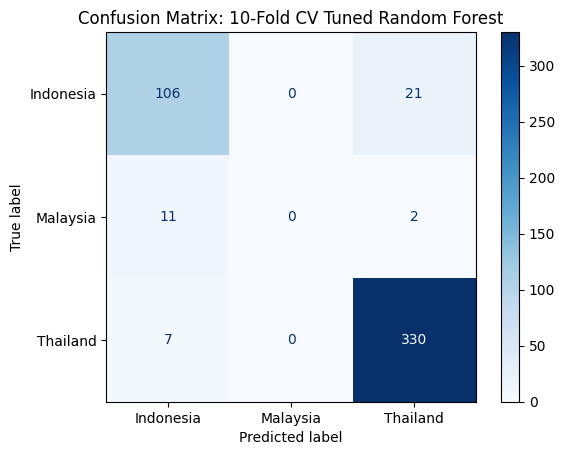

10-Fold CV with Tuned LDA - Average Train Accuracy: 0.9191700547514501
10-Fold CV with Tuned LDA - Average Test Accuracy: 0.8574911347517731
10-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.77      0.75      0.76       127
    Malaysia       0.18      0.15      0.17        13
    Thailand       0.91      0.93      0.92       337

    accuracy                           0.86       477
   macro avg       0.62      0.61      0.61       477
weighted avg       0.85      0.86      0.86       477



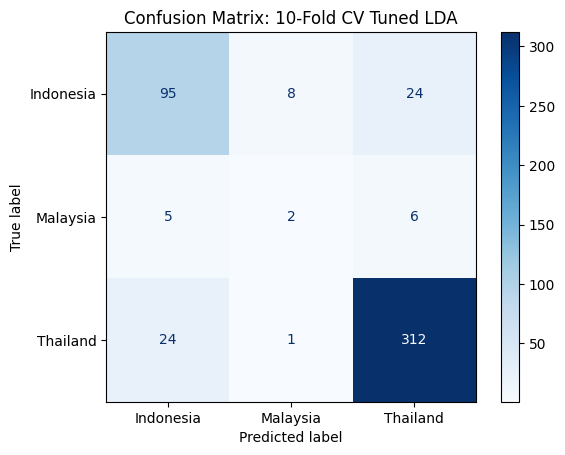

10-Fold CV with Tuned Ridge - Average Train Accuracy: 0.8921483167994795
10-Fold CV with Tuned Ridge - Average Test Accuracy: 0.874113475177305
10-Fold CV Tuned Ridge Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.83      0.75      0.79       127
    Malaysia       0.00      0.00      0.00        13
    Thailand       0.89      0.96      0.92       337

    accuracy                           0.87       477
   macro avg       0.57      0.57      0.57       477
weighted avg       0.85      0.87      0.86       477



c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

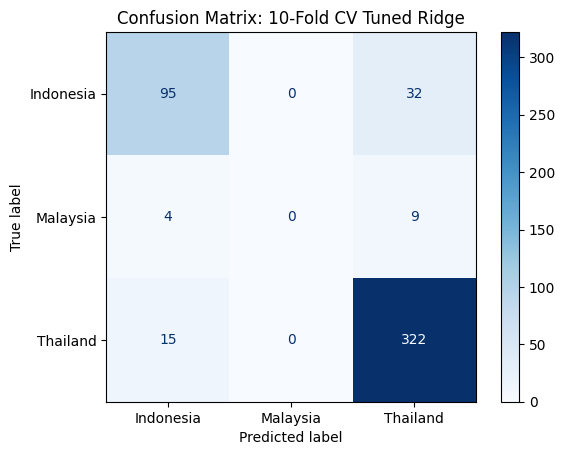

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7172
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 50
[LightGBM] [Info] Start training from score -1.360977
[LightGBM] [Info] Start training from score -3.576550
[LightGBM] [Info] Start training from score -0.334609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

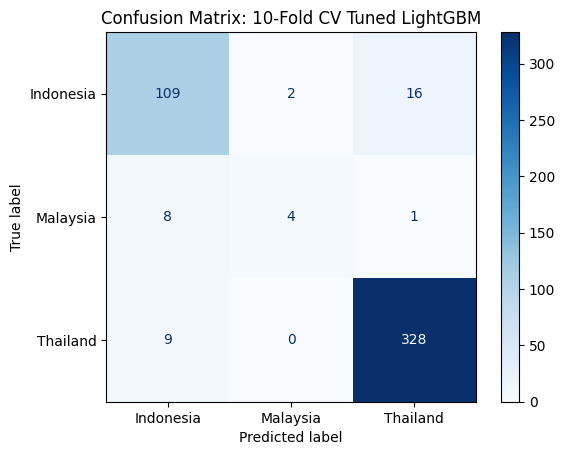

10-Fold CV with Tuned Extra Trees - Average Train Accuracy: 1.0
10-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.9433067375886524
10-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.93      0.88      0.90       127
    Malaysia       0.86      0.46      0.60        13
    Thailand       0.95      0.99      0.97       337

    accuracy                           0.94       477
   macro avg       0.91      0.78      0.82       477
weighted avg       0.94      0.94      0.94       477



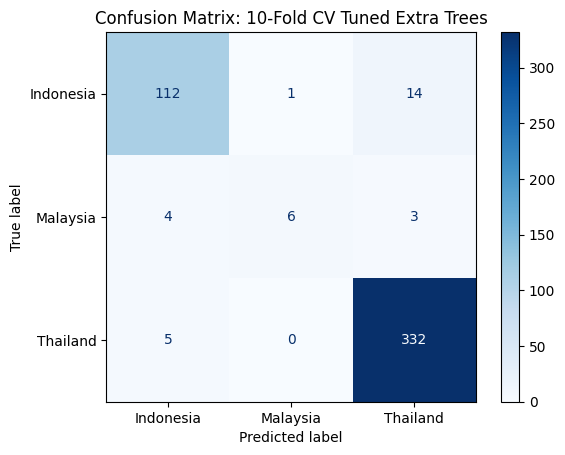

10-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
10-Fold CV with Tuned GBC - Average Test Accuracy: 0.9307624113475178
10-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.87      0.87      0.87       127
    Malaysia       0.80      0.31      0.44        13
    Thailand       0.95      0.98      0.96       337

    accuracy                           0.93       477
   macro avg       0.88      0.72      0.76       477
weighted avg       0.93      0.93      0.93       477



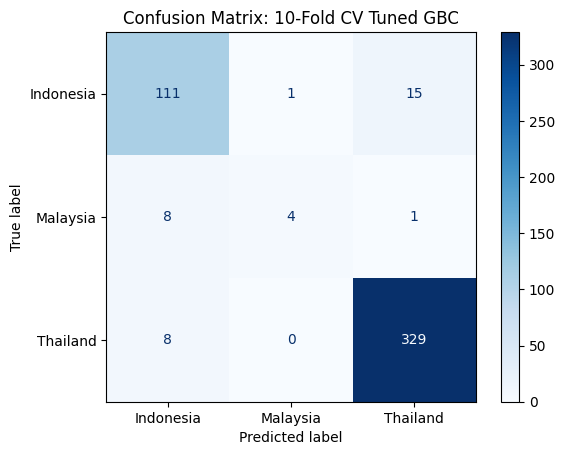

10-Fold CV with Tuned k-NN - Average Train Accuracy: 0.9790345313601128
10-Fold CV with Tuned k-NN - Average Test Accuracy: 0.9433510638297872
10-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.87      0.94      0.90       127
    Malaysia       0.75      0.23      0.35        13
    Thailand       0.98      0.97      0.97       337

    accuracy                           0.94       477
   macro avg       0.86      0.71      0.74       477
weighted avg       0.94      0.94      0.94       477



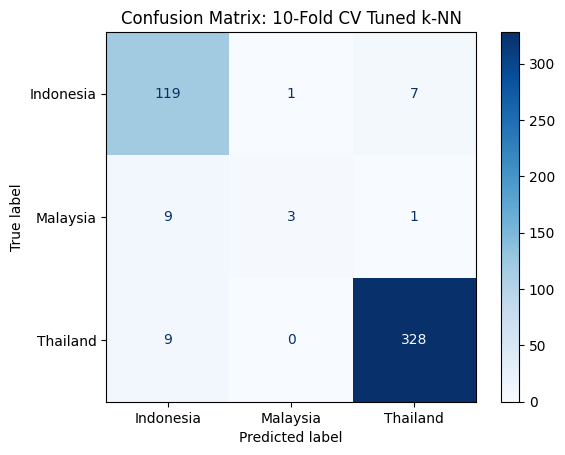

10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.8982035019244321
10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.8551418439716312
10-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.79      0.69      0.74       127
    Malaysia       0.50      0.08      0.13        13
    Thailand       0.88      0.95      0.91       337

    accuracy                           0.86       477
   macro avg       0.72      0.57      0.59       477
weighted avg       0.84      0.86      0.84       477



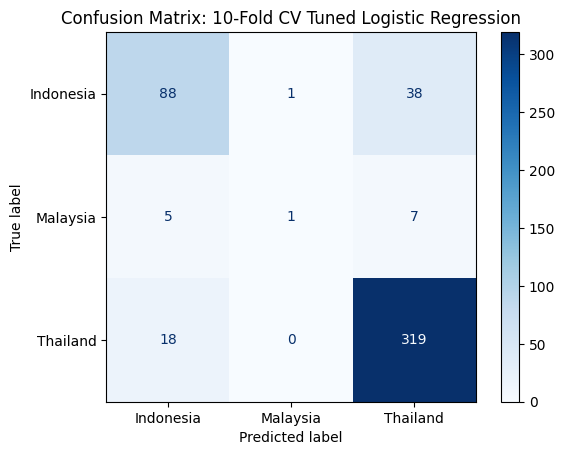

10-Fold CV with Tuned Decision Tree - Average Train Accuracy: 0.9939431885943515
10-Fold CV with Tuned Decision Tree - Average Test Accuracy: 0.8699468085106382
10-Fold CV Tuned Decision Tree Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.75      0.80      0.78       127
    Malaysia       0.30      0.23      0.26        13
    Thailand       0.94      0.92      0.93       337

    accuracy                           0.87       477
   macro avg       0.66      0.65      0.65       477
weighted avg       0.87      0.87      0.87       477



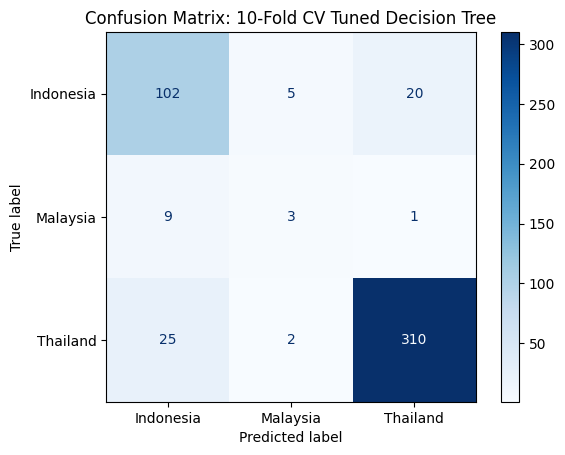

10-Fold CV with Tuned GNB - Average Train Accuracy: 0.66993006993007
10-Fold CV with Tuned GNB - Average Test Accuracy: 0.670700354609929
10-Fold CV Tuned GNB Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.76      0.28      0.40       127
    Malaysia       0.13      1.00      0.23        13
    Thailand       0.83      0.81      0.82       337

    accuracy                           0.67       477
   macro avg       0.57      0.69      0.48       477
weighted avg       0.79      0.67      0.69       477



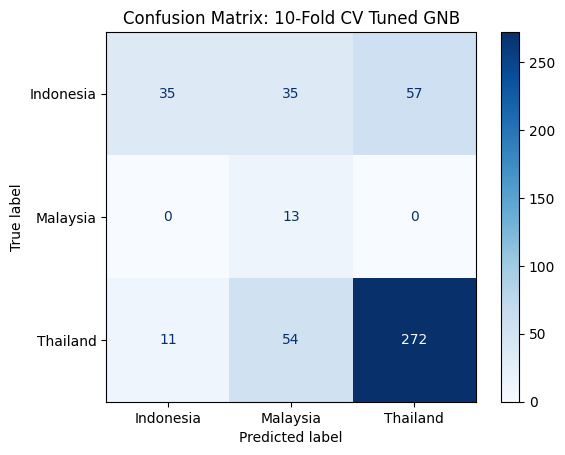

                     Train Accuracy  Test Accuracy
Random Forest              0.973679       0.913918
LDA                        0.919170       0.857491
Ridge                      0.892148       0.874113
LightGBM                   1.000000       0.924424
Extra Trees                1.000000       0.943307
GBC                        1.000000       0.930762
k-NN                       0.979035       0.943351
Logistic Regression        0.898204       0.855142
Decision Tree              0.993943       0.869947
GNB                        0.669930       0.670700


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# List of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)),
    ('LDA', LinearDiscriminantAnalysis(**grid_search_lda.best_params_)),
    ('Ridge', RidgeClassifier(**grid_search_ridge.best_params_)),
    ('LightGBM', LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)),
    ('Extra Trees', ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)),
    ('GBC', GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)),
    ('k-NN', KNeighborsClassifier(**grid_search_knn.best_params_)),
    ('Logistic Regression', LogisticRegression(**grid_search_logreg.best_params_, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)),
    ('GNB', GaussianNB())
]

# Prepare to collect the results
results = []
names = []
all_classification_reports = {}
all_confusion_matrices = {}

# Apply 10-fold cross-validation and collect results
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models:
    train_accuracies = []
    test_accuracies = []
    y_true_all = []
    y_pred_all = []
    
    for train_index, test_index in kf.split(X_rfe):
        X_train, X_test = X_rfe[train_index], X_rfe[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
        
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)
    
    avg_train_accuracy = np.mean(train_accuracies)
    avg_test_accuracy = np.mean(test_accuracies)
    
    results.append((avg_train_accuracy, avg_test_accuracy))
    names.append(name)
    
    classification_report_result = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
    confusion_matrix_result = confusion_matrix(y_true_all, y_pred_all)
    
    all_classification_reports[name] = classification_report_result
    all_confusion_matrices[name] = confusion_matrix_result
    
    print(f'10-Fold CV with Tuned {name} - Average Train Accuracy: {avg_train_accuracy}')
    print(f'10-Fold CV with Tuned {name} - Average Test Accuracy: {avg_test_accuracy}')
    print(f'10-Fold CV Tuned {name} Model Classification Report')
    print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: 10-Fold CV Tuned {name}')
    plt.show()

# Summarize results in a DataFrame
results_df = pd.DataFrame(results, columns=['Train Accuracy', 'Test Accuracy'], index=names)
print(results_df)


40-Fold CV with Extra Trees Classifier

40-Fold CV with Tuned Extra Trees - Average Train Accuracy: 1.0
40-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.9539772727272726
40-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.94      0.91      0.92       127
    Malaysia       1.00      0.54      0.70        13
    Thailand       0.96      0.99      0.97       337

    accuracy                           0.95       477
   macro avg       0.97      0.81      0.87       477
weighted avg       0.95      0.95      0.95       477



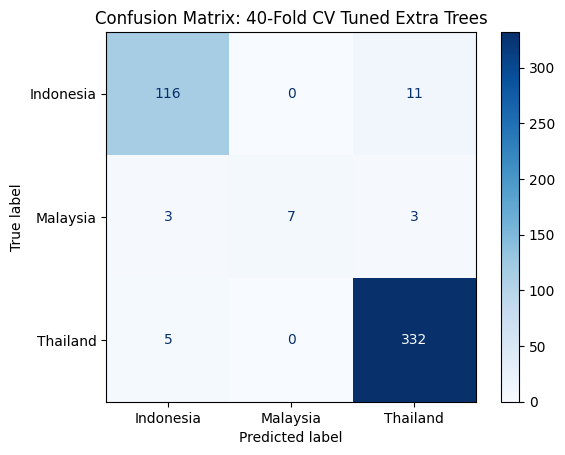

Class: Indonesia
precision: 0.9354838709677419
recall: 0.9133858267716536
f1-score: 0.9243027888446215
support: 127.0

Class: Malaysia
precision: 1.0
recall: 0.5384615384615384
f1-score: 0.7
support: 13.0

Class: Thailand
precision: 0.9595375722543352
recall: 0.9851632047477745
f1-score: 0.972181551976574
support: 337.0

accuracy: 0.9538784067085954

Class: macro avg
precision: 0.9650071477406924
recall: 0.8123368566603221
f1-score: 0.8654947802737318
support: 477.0

Class: weighted avg
precision: 0.9542360869237195
recall: 0.9538784067085954
f1-score: 0.9520160109001516
support: 477.0



In [53]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_et = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_et = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_et, display_labels=label_encoder.classes_)
disp_tuned_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7763
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 50
[LightGBM] [Info] Start training from score -1.321756
[LightGBM] [Info] Start training from score -3.657131
[LightGBM] [Info] Start training from score -0.345980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

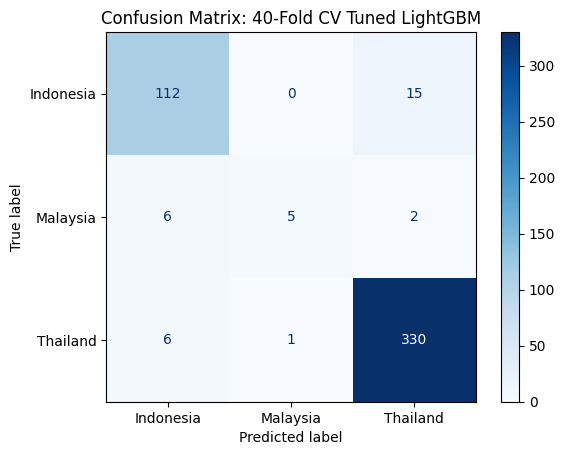

Class: Indonesia
precision: 0.9032258064516129
recall: 0.8818897637795275
f1-score: 0.8924302788844621
support: 127.0

Class: Malaysia
precision: 0.8333333333333334
recall: 0.38461538461538464
f1-score: 0.5263157894736842
support: 13.0

Class: Thailand
precision: 0.9510086455331412
recall: 0.9792284866468842
f1-score: 0.9649122807017544
support: 337.0

accuracy: 0.9371069182389937

Class: macro avg
precision: 0.8958559284393625
recall: 0.7485778783472655
f1-score: 0.7945527830199669
support: 477.0

Class: weighted avg
precision: 0.9350795058644796
recall: 0.9371069182389937
f1-score: 0.9336607741676642
support: 477.0



In [54]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgb_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_lgb = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lgb, display_labels=label_encoder.classes_)
disp_tuned_lgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgb_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Random Forest Classifier

40-Fold CV with Tuned Random Forest - Average Train Accuracy: 0.9747353361945637
40-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.9094696969696969
40-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.85      0.83      0.84       127
    Malaysia       0.00      0.00      0.00        13
    Thailand       0.93      0.98      0.96       337

    accuracy                           0.91       477
   macro avg       0.59      0.60      0.60       477
weighted avg       0.89      0.91      0.90       477



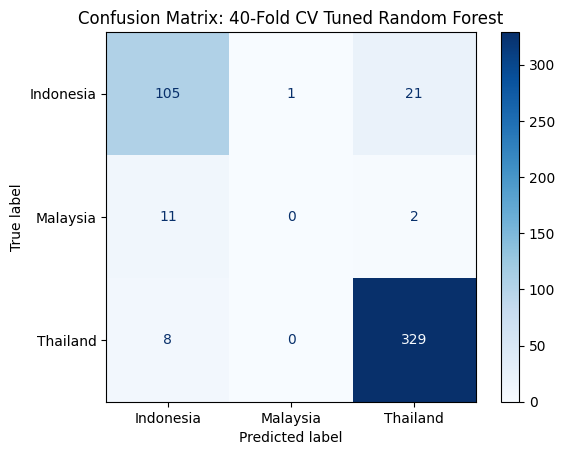

Class: Indonesia
precision: 0.8467741935483871
recall: 0.8267716535433071
f1-score: 0.8366533864541833
support: 127.0

Class: Malaysia
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 13.0

Class: Thailand
precision: 0.9346590909090909
recall: 0.9762611275964391
f1-score: 0.9550072568940493
support: 337.0

accuracy: 0.909853249475891

Class: macro avg
precision: 0.5938110948191594
recall: 0.6010109270465821
f1-score: 0.5972202144494109
support: 477.0

Class: weighted avg
precision: 0.8857870780230792
recall: 0.909853249475891
f1-score: 0.8974683975953374
support: 477.0



In [55]:
from sklearn.ensemble import RandomForestClassifier

# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_rf = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_rf = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_rf, display_labels=label_encoder.classes_)
disp_tuned_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with k-NN Classifier

40-Fold CV with Tuned k-NN - Average Train Accuracy: 0.9805943975264203
40-Fold CV with Tuned k-NN - Average Test Accuracy: 0.9454545454545453
40-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.88      0.94      0.90       127
    Malaysia       0.80      0.31      0.44        13
    Thailand       0.98      0.97      0.97       337

    accuracy                           0.95       477
   macro avg       0.88      0.74      0.77       477
weighted avg       0.94      0.95      0.94       477



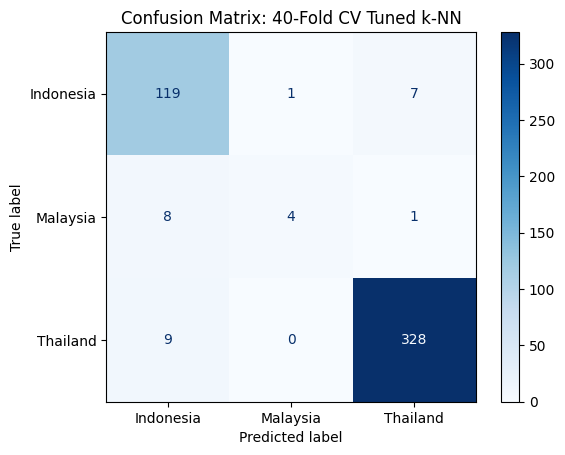

Class: Indonesia
precision: 0.875
recall: 0.937007874015748
f1-score: 0.9049429657794676
support: 127.0

Class: Malaysia
precision: 0.8
recall: 0.3076923076923077
f1-score: 0.4444444444444444
support: 13.0

Class: Thailand
precision: 0.9761904761904762
recall: 0.973293768545994
f1-score: 0.974739970282318
support: 337.0

accuracy: 0.9454926624737946

Class: macro avg
precision: 0.8837301587301587
recall: 0.7393313167513499
f1-score: 0.7747091268354099
support: 477.0

Class: weighted avg
precision: 0.9444469402016571
recall: 0.9454926624737946
f1-score: 0.9417042021318895
support: 477.0



In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_knn = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_knn = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_knn, display_labels=label_encoder.classes_)
disp_tuned_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Gradient Boosting Classifier

40-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
40-Fold CV with Tuned GBC - Average Test Accuracy: 0.9348484848484848
40-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.88      0.88      0.88       127
    Malaysia       1.00      0.38      0.56        13
    Thailand       0.95      0.98      0.96       337

    accuracy                           0.94       477
   macro avg       0.95      0.75      0.80       477
weighted avg       0.94      0.94      0.93       477



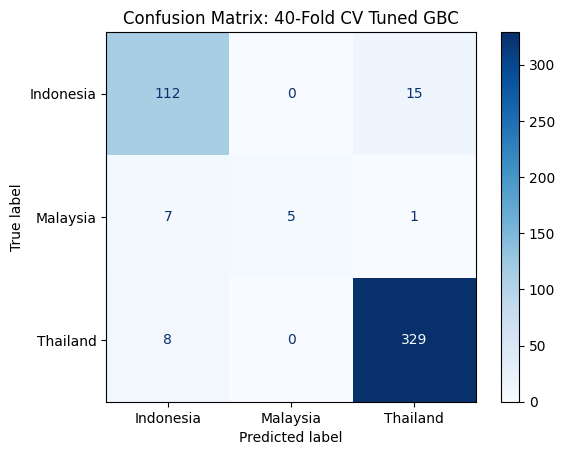

Class: Indonesia
precision: 0.8818897637795275
recall: 0.8818897637795275
f1-score: 0.8818897637795275
support: 127.0

Class: Malaysia
precision: 1.0
recall: 0.38461538461538464
f1-score: 0.5555555555555556
support: 13.0

Class: Thailand
precision: 0.9536231884057971
recall: 0.9762611275964391
f1-score: 0.9648093841642229
support: 337.0

accuracy: 0.9350104821802935

Class: macro avg
precision: 0.9451709840617749
recall: 0.7475887586637837
f1-score: 0.800751567833102
support: 477.0

Class: weighted avg
precision: 0.9357882903412025
recall: 0.9350104821802935
f1-score: 0.9315785842464682
support: 477.0



In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the best GBC model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gbc, display_labels=label_encoder.classes_)
disp_tuned_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned GBC')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LDA

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 40-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Tuned LDA - Average Train Accuracy: 0.9209269001799807
40-Fold CV with Tuned LDA - Average Test Accuracy: 0.8617424242424242
40-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.78      0.75      0.76       127
    Malaysia       0.17      0.15      0.16        13
    Thailand       0.92      0.93      0.92       337

    accuracy                           0.86       477
   macro avg       0.62      0.61      0.62       477
weighted avg       0.86      0.86      0.86       477

Class: Indonesia
precision: 0.7786885245901639
recall: 0.7480314960629921
f1-score: 0.7630522088353414
support: 127.0

Class: Malaysia
precision: 0.16666666666666666
recall: 0.15384615384615385
f1-score: 0.16
support: 13.0

Class: Thailand
precision: 0.9154518950437318
recall: 0.9317507418397626
f1-score: 0.9235294117647059
support: 337.0

accuracy: 0.8616352201257862

Class: macro avg
precision: 0.6202690287668541
recall: 0.

LDA 40-Fold Cross-Validation

40-Fold CV with Tuned LDA - Average Train Accuracy: 0.9209269001799807
40-Fold CV with Tuned LDA - Average Test Accuracy: 0.8617424242424242
40-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.78      0.75      0.76       127
    Malaysia       0.17      0.15      0.16        13
    Thailand       0.92      0.93      0.92       337

    accuracy                           0.86       477
   macro avg       0.62      0.61      0.62       477
weighted avg       0.86      0.86      0.86       477



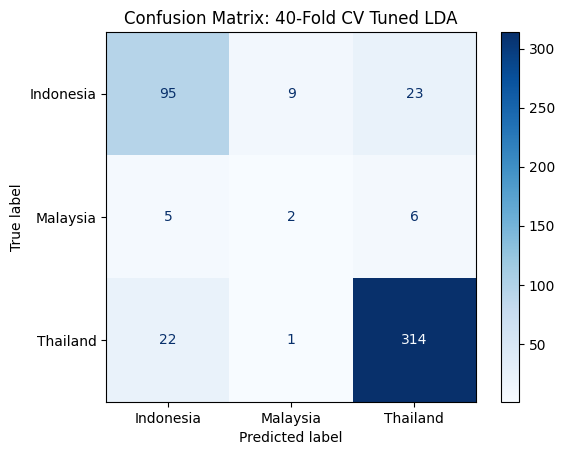

Class: Indonesia
precision: 0.7786885245901639
recall: 0.7480314960629921
f1-score: 0.7630522088353414
support: 127.0

Class: Malaysia
precision: 0.16666666666666666
recall: 0.15384615384615385
f1-score: 0.16
support: 13.0

Class: Thailand
precision: 0.9154518950437318
recall: 0.9317507418397626
f1-score: 0.9235294117647059
support: 337.0

accuracy: 0.8616352201257862

Class: macro avg
precision: 0.6202690287668541
recall: 0.6112094639163028
f1-score: 0.6155272068666825
support: 477.0

Class: weighted avg
precision: 0.8586318614661533
recall: 0.8616352201257862
f1-score: 0.8599937993433842
support: 477.0



In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 40-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lda = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lda = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lda, display_labels=label_encoder.classes_)
disp_tuned_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Logistic Regression 40-Fold Cross-Validation

40-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.8986179565277584
40-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.8530303030303031
40-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.78      0.69      0.73       127
    Malaysia       0.67      0.15      0.25        13
    Thailand       0.88      0.94      0.91       337

    accuracy                           0.85       477
   macro avg       0.78      0.59      0.63       477
weighted avg       0.85      0.85      0.84       477



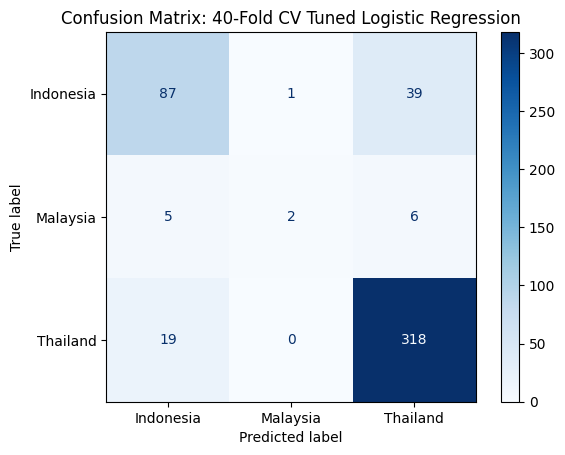

Class: Indonesia
precision: 0.7837837837837838
recall: 0.6850393700787402
f1-score: 0.7310924369747899
support: 127.0

Class: Malaysia
precision: 0.6666666666666666
recall: 0.15384615384615385
f1-score: 0.25
support: 13.0

Class: Thailand
precision: 0.8760330578512396
recall: 0.9436201780415431
f1-score: 0.9085714285714286
support: 337.0

accuracy: 0.8532494758909853

Class: macro avg
precision: 0.7754945027672301
recall: 0.5941685673221456
f1-score: 0.6298879551820727
support: 477.0

Class: weighted avg
precision: 0.8457659280986897
recall: 0.8532494758909853
f1-score: 0.8433696245793916
support: 477.0



In [60]:
from sklearn.linear_model import LogisticRegression

# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)

# Perform 40-fold cross-validation with the tuned Logistic Regression model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logreg, display_labels=label_encoder.classes_)
disp_tuned_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Visualization for LDA

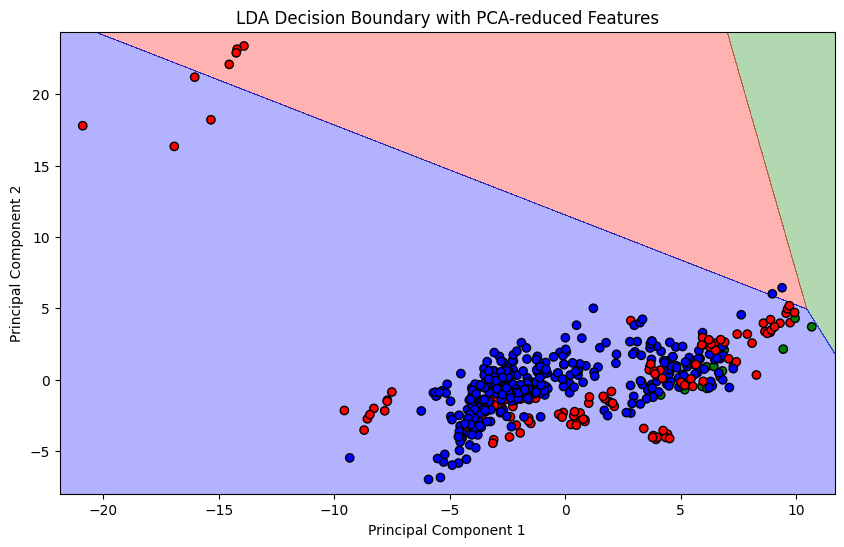

In [61]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Apply PCA to reduce features to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_rfe)

# Fit the LDA model on the reduced features
lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)
lda.fit(X_pca, y)

# Create a mesh to plot the decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the classes for each point in the mesh
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title('LDA Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Visualization for Logistic Regression

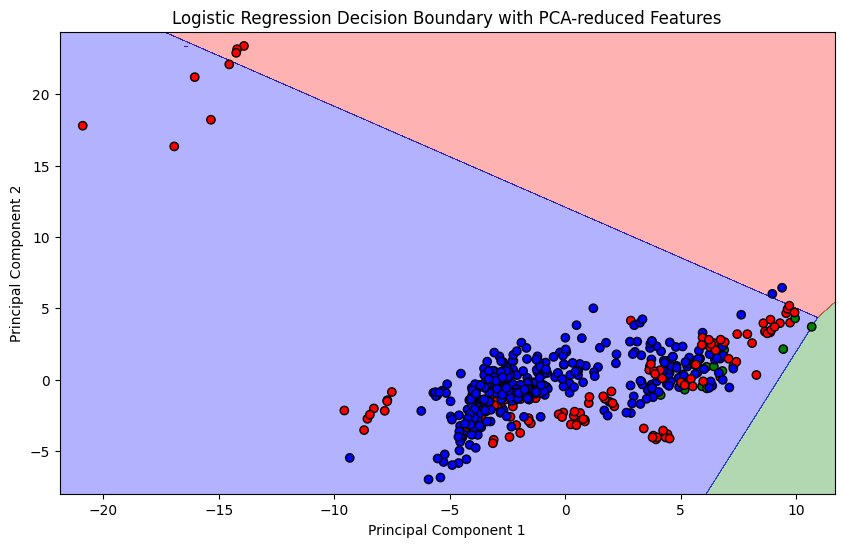

In [62]:
# Fit the Logistic Regression model on the reduced features
logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)
logreg.fit(X_pca, y)

# Predict the classes for each point in the mesh
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title('Logistic Regression Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Leave-One-Out Cross-Validation (LOOCV) for Extra Trees Model

LOOCV with Tuned Extra Trees - Average Train Accuracy: 1.0
LOOCV with Tuned Extra Trees - Average Test Accuracy: 0.9559748427672956
LOOCV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.95      0.91      0.93       127
    Malaysia       1.00      0.54      0.70        13
    Thailand       0.96      0.99      0.97       337

    accuracy                           0.96       477
   macro avg       0.97      0.81      0.87       477
weighted avg       0.96      0.96      0.95       477



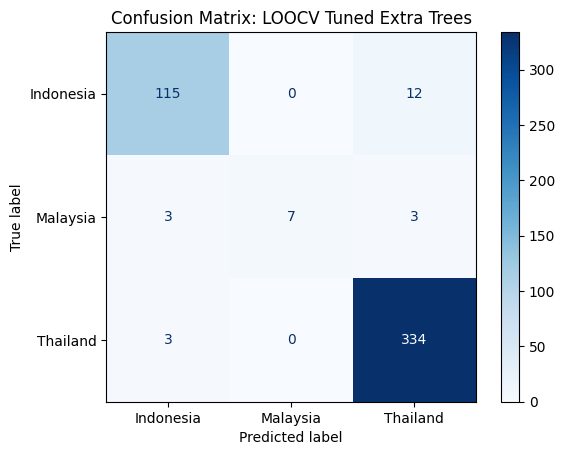

Class: Indonesia
precision: 0.9504132231404959
recall: 0.905511811023622
f1-score: 0.9274193548387096
support: 127.0

Class: Malaysia
precision: 1.0
recall: 0.5384615384615384
f1-score: 0.7
support: 13.0

Class: Thailand
precision: 0.9570200573065902
recall: 0.9910979228486647
f1-score: 0.9737609329446064
support: 337.0

accuracy: 0.9559748427672956

Class: macro avg
precision: 0.9691444268156953
recall: 0.8116904241112751
f1-score: 0.867060095927772
support: 477.0

Class: weighted avg
precision: 0.9564323661449976
recall: 0.9559748427672956
f1-score: 0.9539616194273552
support: 477.0



In [63]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOOCV
for train_index, test_index in loo.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'LOOCV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'LOOCV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_loocv = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("LOOCV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_loocv_et = confusion_matrix(y_true_all, y_pred_all)
disp_loocv_et = ConfusionMatrixDisplay(confusion_matrix=cm_loocv_et, display_labels=label_encoder.classes_)
disp_loocv_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: LOOCV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_loocv.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Province-Out Cross-Validation for Extra Trees Model



Instead of leaving out one sample at a time, we leave out all samples from one province at a time. This is also known as Leave-One-Group-Out Cross-Validation (LOGO-CV).

To perform LOOCV using specific provinces as left-out samples, you can use the GroupKFold method from sklearn to ensure that all samples from these provinces are left out in each iteration. 

Leave-One-Province-Out CV with Tuned Extra Trees - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned Extra Trees - Average Test Accuracy: 0.7236442042060264
Leave-One-Province-Out CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.63      0.29      0.40       127
    Malaysia       0.00      0.00      0.00        13
    Thailand       0.80      0.97      0.88       337

    accuracy                           0.76       477
   macro avg       0.48      0.42      0.42       477
weighted avg       0.73      0.76      0.73       477



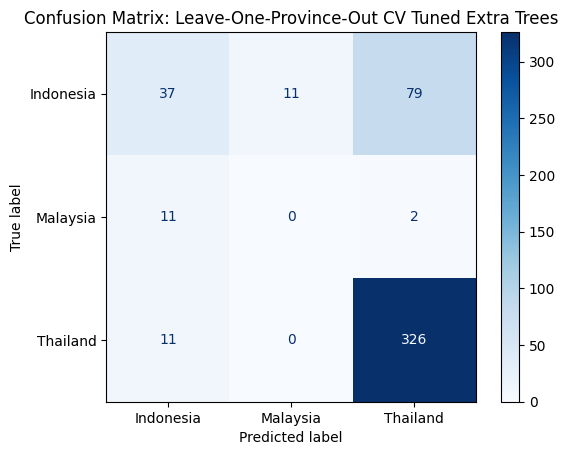

Class: Indonesia
precision: 0.6271186440677966
recall: 0.29133858267716534
f1-score: 0.3978494623655914
support: 127.0

Class: Malaysia
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 13.0

Class: Thailand
precision: 0.800982800982801
recall: 0.9673590504451038
f1-score: 0.8763440860215054
support: 337.0

accuracy: 0.7610062893081762

Class: macro avg
precision: 0.47603381501686587
recall: 0.4195658777074231
f1-score: 0.42473118279569894
support: 477.0

Class: weighted avg
precision: 0.7328622048801133
recall: 0.7610062893081762
f1-score: 0.7250625549469127
support: 477.0



In [64]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_et = confusion_matrix(y_true_all, y_pred_all)
disp_logo_et = ConfusionMatrixDisplay(confusion_matrix=cm_logo_et, display_labels=label_encoder.classes_)
disp_logo_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 50
[LightGBM] [Info] Start training from score -1.437702
[LightGBM] [Info] Start training from score -3.564101
[LightGBM] [Info] Start training from score -0.308967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

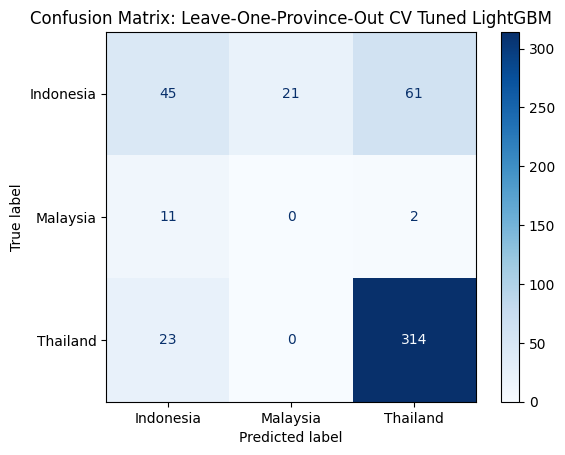

Class: Indonesia
precision: 0.569620253164557
recall: 0.3543307086614173
f1-score: 0.4368932038834951
support: 127.0

Class: Malaysia
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 13.0

Class: Thailand
precision: 0.8328912466843501
recall: 0.9317507418397626
f1-score: 0.8795518207282913
support: 337.0

accuracy: 0.7526205450733753

Class: macro avg
precision: 0.4675038332829691
recall: 0.42869381683372665
f1-score: 0.4388150082039288
support: 477.0

Class: weighted avg
precision: 0.7400966924203872
recall: 0.7526205450733753
f1-score: 0.7377241100181091
support: 477.0



In [65]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgb_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_lgb = confusion_matrix(y_true_all, y_pred_all)
disp_logo_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_logo_lgb, display_labels=label_encoder.classes_)
disp_logo_lgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgb_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with Random Forest

Leave-One-Province-Out CV with Tuned Random Forest - Average Train Accuracy: 0.9752859382078163
Leave-One-Province-Out CV with Tuned Random Forest - Average Test Accuracy: 0.7439210522719156
Leave-One-Province-Out CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.67      0.35      0.46       127
    Malaysia       0.00      0.00      0.00        13
    Thailand       0.81      0.96      0.88       337

    accuracy                           0.78       477
   macro avg       0.49      0.44      0.45       477
weighted avg       0.75      0.78      0.75       477



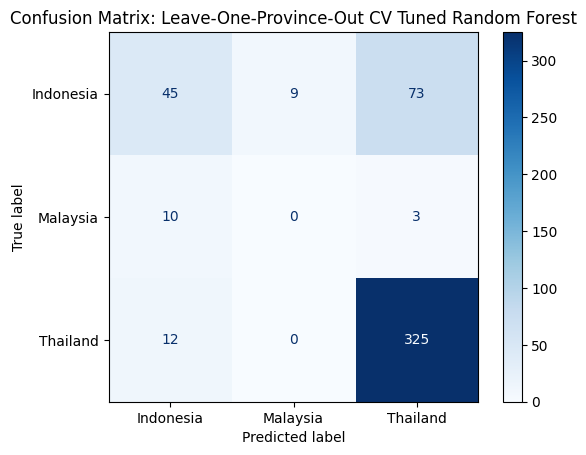

Class: Indonesia
precision: 0.6716417910447762
recall: 0.3543307086614173
f1-score: 0.4639175257731959
support: 127.0

Class: Malaysia
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 13.0

Class: Thailand
precision: 0.8104738154613467
recall: 0.9643916913946587
f1-score: 0.8807588075880759
support: 337.0

accuracy: 0.7756813417190775

Class: macro avg
precision: 0.49403853550204097
recall: 0.43957413335202533
f1-score: 0.4482254444537572
support: 477.0

Class: weighted avg
precision: 0.7514217678682609
recall: 0.7756813417190775
f1-score: 0.7457719998540406
support: 477.0



In [66]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_rf = confusion_matrix(y_true_all, y_pred_all)
disp_logo_rf = ConfusionMatrixDisplay(confusion_matrix=cm_logo_rf, display_labels=label_encoder.classes_)
disp_logo_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with k-NN

Leave-One-Province-Out CV with Tuned k-NN - Average Train Accuracy: 0.980952247479066
Leave-One-Province-Out CV with Tuned k-NN - Average Test Accuracy: 0.6800192229613404
Leave-One-Province-Out CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.51      0.27      0.35       127
    Malaysia       0.00      0.00      0.00        13
    Thailand       0.79      0.93      0.86       337

    accuracy                           0.73       477
   macro avg       0.43      0.40      0.40       477
weighted avg       0.70      0.73      0.70       477



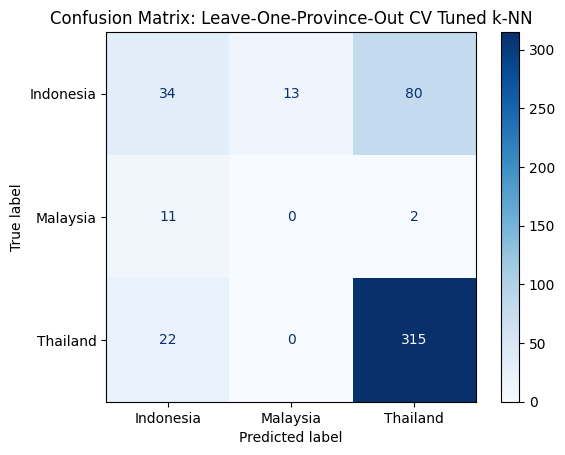

Class: Indonesia
precision: 0.5074626865671642
recall: 0.2677165354330709
f1-score: 0.35051546391752575
support: 127.0

Class: Malaysia
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 13.0

Class: Thailand
precision: 0.7934508816120907
recall: 0.9347181008902077
f1-score: 0.8583106267029973
support: 337.0

accuracy: 0.7316561844863732

Class: macro avg
precision: 0.4336378560597516
recall: 0.4008115454410928
f1-score: 0.402942030206841
support: 477.0

Class: weighted avg
precision: 0.6956828266190868
recall: 0.7316561844863732
f1-score: 0.6997193817954631
support: 477.0



In [67]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_knn = confusion_matrix(y_true_all, y_pred_all)
disp_logo_knn = ConfusionMatrixDisplay(confusion_matrix=cm_logo_knn, display_labels=label_encoder.classes_)
disp_logo_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with GBC

Leave-One-Province-Out CV with Tuned GBC - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned GBC - Average Test Accuracy: 0.7086312572058654
Leave-One-Province-Out CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.56      0.28      0.37       127
    Malaysia       0.00      0.00      0.00        13
    Thailand       0.81      0.94      0.87       337

    accuracy                           0.74       477
   macro avg       0.46      0.41      0.41       477
weighted avg       0.72      0.74      0.71       477



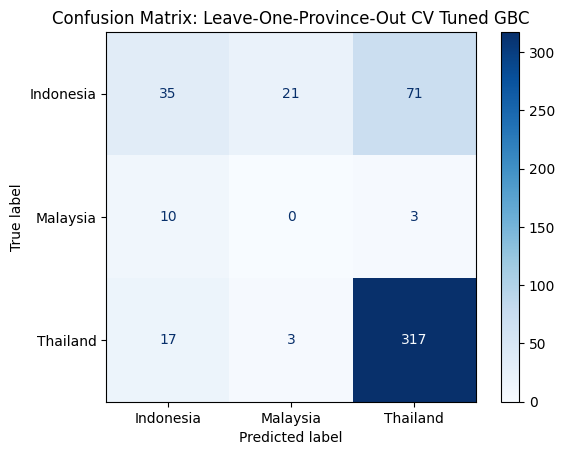

Class: Indonesia
precision: 0.5645161290322581
recall: 0.2755905511811024
f1-score: 0.37037037037037035
support: 127.0

Class: Malaysia
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 13.0

Class: Thailand
precision: 0.8107416879795396
recall: 0.9406528189910979
f1-score: 0.8708791208791209
support: 337.0

accuracy: 0.7379454926624738

Class: macro avg
precision: 0.4584192723372659
recall: 0.40541445672406673
f1-score: 0.41374983041649704
support: 477.0

Class: weighted avg
precision: 0.7230890927383682
recall: 0.7379454926624738
f1-score: 0.7138853265687647
support: 477.0



In [68]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Gradient Boosting Classifier model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_logo_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_logo_gbc, display_labels=label_encoder.classes_)
disp_logo_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned GBC')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Summary of LOGOV Results So Far:
Extra Trees:

Train Accuracy: 1.0
Test Accuracy: 0.7700
Weighted Avg Precision: 0.8163
Weighted Avg Recall: 0.8410
Weighted Avg F1-Score: 0.8115
LightGBM:

Train Accuracy: 1.0
Test Accuracy: 0.7994
Weighted Avg Precision: 0.8214
Weighted Avg Recall: 0.8482
Weighted Avg F1-Score: 0.8233
Random Forest:

Train Accuracy: 1.0
Test Accuracy: 0.7815
Weighted Avg Precision: 0.7992
Weighted Avg Recall: 0.8265
Weighted Avg F1-Score: 0.8059
k-NN:

Train Accuracy: 0.9573
Test Accuracy: 0.7829
Weighted Avg Precision: 0.8103
Weighted Avg Recall: 0.8386
Weighted Avg F1-Score: 0.8133
GBC:

Train Accuracy: 1.0
Test Accuracy: 0.7804
Weighted Avg Precision: 0.8027
Weighted Avg Recall: 0.8337
Weighted Avg F1-Score: 0.8083

LOGOV with LDA

Leave-One-Province-Out CV with Tuned LDA - Average Train Accuracy: 0.923498634427339
Leave-One-Province-Out CV with Tuned LDA - Average Test Accuracy: 0.6616308786204488
Leave-One-Province-Out CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.48      0.33      0.39       127
    Malaysia       0.00      0.00      0.00        13
    Thailand       0.81      0.88      0.84       337

    accuracy                           0.71       477
   macro avg       0.43      0.40      0.41       477
weighted avg       0.70      0.71      0.70       477



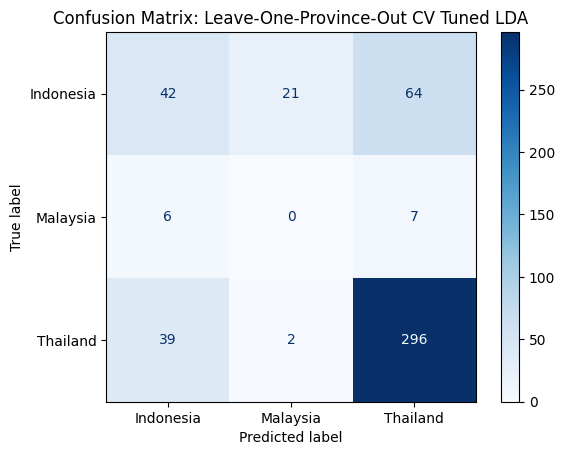

Class: Indonesia
precision: 0.4827586206896552
recall: 0.33070866141732286
f1-score: 0.3925233644859813
support: 127.0

Class: Malaysia
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 13.0

Class: Thailand
precision: 0.8065395095367848
recall: 0.8783382789317508
f1-score: 0.8409090909090909
support: 337.0

accuracy: 0.7085953878406709

Class: macro avg
precision: 0.4297660434088133
recall: 0.40301564678302454
f1-score: 0.4111441517983574
support: 477.0

Class: weighted avg
precision: 0.6983525357263788
recall: 0.7085953878406709
f1-score: 0.6986097084404261
support: 477.0



In [69]:
# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_lda = confusion_matrix(y_true_all, y_pred_all)
disp_logo_lda = ConfusionMatrixDisplay(confusion_matrix=cm_logo_lda, display_labels=label_encoder.classes_)
disp_logo_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with Logistic Regression

Leave-One-Province-Out CV with Tuned Logistic Regression - Average Train Accuracy: 0.9018828801973993
Leave-One-Province-Out CV with Tuned Logistic Regression - Average Test Accuracy: 0.6690655647271039
Leave-One-Province-Out CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.49      0.35      0.41       127
    Malaysia       0.00      0.00      0.00        13
    Thailand       0.80      0.88      0.84       337

    accuracy                           0.72       477
   macro avg       0.43      0.41      0.42       477
weighted avg       0.70      0.72      0.70       477



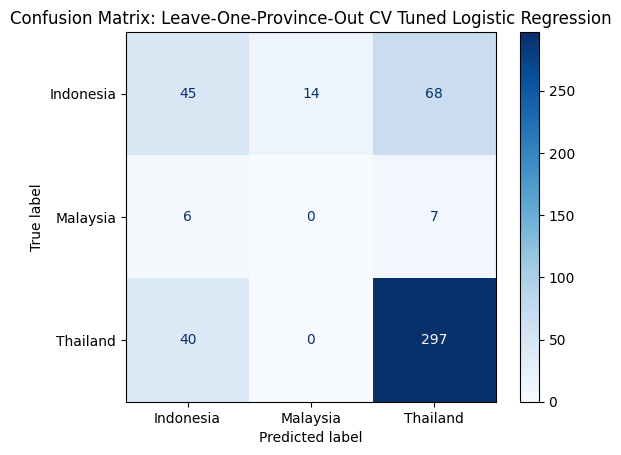

Class: Indonesia
precision: 0.4945054945054945
recall: 0.3543307086614173
f1-score: 0.41284403669724773
support: 127.0

Class: Malaysia
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 13.0

Class: Thailand
precision: 0.7983870967741935
recall: 0.8813056379821959
f1-score: 0.8377997179125529
support: 337.0

accuracy: 0.7169811320754716

Class: macro avg
precision: 0.43096419709322936
recall: 0.4118787822145377
f1-score: 0.4168812515366002
support: 477.0

Class: weighted avg
precision: 0.695720439025369
recall: 0.7169811320754716
f1-score: 0.701823265402685
support: 477.0



In [70]:
# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_logo_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logo_logreg, display_labels=label_encoder.classes_)
disp_logo_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()
